In [ ]:
pip install underthesea python-docx networkx matplotlib nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from docx import Document
from underthesea import ner
import nltk

Build mini-KG cho Chương 6

In [ ]:
import re
from docx import Document
import networkx as nx
import matplotlib.pyplot as plt

def load_docx(filename):
    """
    Đọc file DOCX và trả về danh sách các đoạn văn (paragraphs) không rỗng.
    """
    doc = Document(filename)
    paragraphs = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return paragraphs

def extract_article_header(paragraphs):
    """
    Tìm đoạn chứa tiêu đề của Điều 6.
    Giả sử đoạn bắt đầu bằng "Điều 6" chứa phần tiêu đề được in đậm.
    """
    for para in paragraphs:
        if para.startswith("Điều 6"):
            # Giả sử tiêu đề nằm sau dấu chấm đầu tiên
            parts = para.split(".", 1)
            if len(parts) > 1:
                header = parts[1].strip()
            else:
                header = para.strip()
            return header
    return ""

def extract_points(paragraphs):
    """
    Tách các điểm trong văn bản chỉ dựa vào mẫu mở đầu dạng "x.x)".
    Ví dụ: "1.a) Nội dung điểm ..." sẽ được chuyển thành node với nhãn "6.1.a"
    và nội dung là phần văn bản sau ký hiệu đánh số.
    """
    points = []
    # Biểu thức chính quy: bắt đầu bằng số, dấu chấm, một hoặc nhiều chữ (có thể là chữ thường, in hoa hoặc ký tự 'đ')
    pattern = re.compile(r"^(\d+)\.([a-zA-ZđĐ]+)\)")
    for para in paragraphs:
        m = pattern.match(para)
        if m:
            num = m.group(1)
            letter = m.group(2)
            label = f"6.{num}.{letter}"  # Ví dụ: "6.1.a"
            # Nội dung điểm là phần sau marker
            content = para[m.end():].strip()
            # Nếu nội dung bắt đầu bằng dấu gạch ngang, loại bỏ dấu này
            if content.startswith("-"):
                content = content[1:].strip()
            points.append((label, content))
    return points

def build_knowledge_graph(article_header, points):
    """
    Xây dựng đồ thị knowledge graph vô hướng:
      - Node chính: "6" với thuộc tính 'content' là tiêu đề của Điều 6.
      - Các node điểm với nhãn dạng "6.x.y" và thuộc tính 'content' là nội dung điểm.
      - Tạo cạnh nối từ node "6" đến mỗi node điểm.
    """
    G = nx.DiGraph()  # Đồ thị có hướng hướng

    # Thêm node chính "6"
    main_label = "6"
    G.add_node(main_label, content=article_header)

    # Thêm các node điểm và cạnh nối từ node chính đến từng node điểm
    for label, content in points:
        G.add_node(label, content=content)
        G.add_edge(main_label, label)
        G.add_edge(label, main_label)

    return G

def draw_graph(G):
    """
    Vẽ đồ thị sử dụng NetworkX và Matplotlib.
    Các node hiển thị nhãn (key) và bạn có thể truy cập thuộc tính 'content' nếu cần.
    """
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Knowledge Graph của Điều 6")
    plt.axis("off")
    plt.show()

filename = "Điều 6.docx"
paragraphs = load_docx(filename)
 # Lấy tiêu đề của Điều 6
article_header = extract_article_header(paragraphs)
print("Tiêu đề của Điều 6:", article_header)

# Trích xuất các điểm chỉ với mẫu mở đầu "x.x)"
points = extract_points(paragraphs)
print("Các điểm trích xuất:")
for label, content in points:
      print(f"{label}: {content}")
         # Xây dựng đồ thị knowledge graph
G = build_knowledge_graph(article_header, points)

# Vẽ đồ thị
draw_graph(G)




PackageNotFoundError: Package not found at 'Điều 6.docx'

In [ ]:
G.add_edge("6.1.a", "6.2.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.2.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.2.d", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.2.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.3.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.3.d", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.3.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.3.e", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.3.n", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.3.o", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.b", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.e", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.i", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.k", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.4.l", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.b", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.d", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.i", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.5.k", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.6.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.7.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.7.b", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.7.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.9.b", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.9.d", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.10.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.1.a", "6.11.đ", content="trừ các hành vi vi phạm quy định tại ")

In [ ]:
G.add_edge("6.1.c", "6.7.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.2.a", "6.5.g", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.2.c", "6.5.n", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.2.c", "6.5.o", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.2.đ", "6.4.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.2.đ", "6.7.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.3.e", "6.4.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.3.e", "6.7.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.4.b", "6.7.c", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.4.e", "6.11.đ", content="trừ các hành vi vi phạm quy định tại ")

In [ ]:
G.add_node("6.8", content="Phạt tiền từ 16.000.000 đồng đến 18.000.000 đồng đối với người điều khiển xe thực hiện hành vi vi phạm gây tai nạn giao thông không dừng ngay phương tiện, không giữ nguyên hiện trường, không trợ giúp người bị nạn, không ở lại hiện trường hoặc không đến trình báo ngay với cơ quan công an, Ủy ban nhân dân nơi gần nhất.")
G.add_edge("6", "6.8")
G.add_edge("6.8", "6")
G.add_edge("6.4.g", "6.8", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.4.l", "6.5.d", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.5.b", "6.4.a", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.5.c", "6.3.b", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.5.i", "6.9.d", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.5.i", "6.11.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.9.d", "6.11.đ", content="trừ các hành vi vi phạm quy định tại ")
G.add_edge("6.10.a", "6.11.đ", content="trừ các hành vi vi phạm quy định tại ")

In [ ]:
G.add_node("6.10.b", content="gây tai nạn giao thông, phạt tiền từ 20.000.000 đồng đến 22.000.000 đồng")
G.add_edge("6.1.a", "6.10.b", content="mà ")
G.add_edge("6.1.b", "6.10.b", content="mà ")
G.add_edge("6.1.c", "6.10.b", content="mà ")
G.add_edge("6.1.d", "6.10.b", content="mà ")
G.add_edge("6.1.đ", "6.10.b", content="mà ")
G.add_edge("6.2.c", "6.10.b", content="mà ")
G.add_edge("6.3.b", "6.10.b", content="mà ")
G.add_edge("6.3.g", "6.10.b", content="mà ")
G.add_edge("6.3.h", "6.10.b", content="mà ")
G.add_edge("6.3.n", "6.10.b", content="mà ")
G.add_edge("6.3.o", "6.10.b", content="mà ")
G.add_edge("6.3.p", "6.10.b", content="mà ")
G.add_edge("6.4.a", "6.10.b", content="mà ")
G.add_edge("6.4.c", "6.10.b", content="mà ")
G.add_edge("6.4.d", "6.10.b", content="mà ")
G.add_edge("6.5.c", "6.10.b", content="mà ")
G.add_edge("6.5.d", "6.10.b", content="mà ")
G.add_edge("6.5.e", "6.10.b", content="mà ")
G.add_edge("6.5.h", "6.10.b", content="mà ")
G.add_edge("6.5.n", "6.10.b", content="mà ")
G.add_edge("6.5.o", "6.10.b", content="mà ")
G.add_edge("6.5.q", "6.10.b", content="mà ")
G.add_edge("6.7.b", "6.10.b", content="mà ")
G.add_edge("6.9.b", "6.10.b", content="mà ")
G.add_edge("6.9.c", "6.10.b", content="mà ")
G.add_edge("6.9.d", "6.10.b", content="mà ")

In [ ]:
G.add_node("6.12", content="Người điều khiển xe thực hiện hành vi điều khiển xe lạng lách, đánh võng trên đường bộ; chạy quá tốc độ đuổi nhau trên đường bộ; dùng chân điều khiển vô lăng xe khi xe đang chạy trên đường bộ -> Bị phạt tiền từ 40.000.000 đồng đến 50.000.000 đồng")
G.add_node("6.13", content="phạt tiền thêm từ 50.000.000 đồng đến 70.000.000 đồng ")
G.add_node("6.14", content="Tịch thu phương tiện đối với người điều khiển xe tái phạm hành vi điều khiển xe lạng lách, đánh võng quy định")
G.add_node("6.15.a", content="Tịch thu thiết bị phát tín hiệu ưu tiên lắp đặt, sử dụng trái quy định")
G.add_node("6.15.b", content="Tước quyền sử dụng giấy phép lái xe từ 10 tháng đến 12 tháng")
G.add_node("6.15.c", content="Tước quyền sử dụng giấy phép lái xe từ 22 tháng đến 24 tháng")
G.add_node("6.16.a", content="Trừ điểm giấy phép lái xe 02 điểm")
G.add_node("6.16.b", content="Trừ điểm giấy phép lái xe 04 điểm")
G.add_node("6.16.c", content="Trừ điểm giấy phép lái xe 06 điểm")
G.add_node("6.16.d", content="Trừ điểm giấy phép lái xe 10 điểm")

In [ ]:
G.add_edge("6.12", "6.13", content ="Nếu gây tai nan giao thông, ")

In [ ]:
G.add_edge("6", "6.12")
G.add_edge("6.12", "6")
G.add_edge("6", "6.13")
G.add_edge("6.13", "6")
G.add_edge("6", "6.14")
G.add_edge("6.14", "6")
G.add_edge("6", "6.15.a")
G.add_edge("6.15.a", "6")
G.add_edge("6", "6.15.b")
G.add_edge("6.15.b", "6")
G.add_edge("6", "6.15.c")
G.add_edge("6.15.c", "6")
G.add_edge("6", "6.16.a")
G.add_edge("6.16.a", "6")
G.add_edge("6", "6.16.b")
G.add_edge("6.16.b", "6")
G.add_edge("6", "6.16.c")
G.add_edge("6.16.c", "6")
G.add_edge("6", "6.16.d")
G.add_edge("6.16.d", "6")

In [ ]:
G.add_edge("6.12", "6.14", content="bị ")
G.add_edge("6.5.e", "6.15.a", content="bị ")
G.add_edge("6.12", "6.15.b", content="bị ")
G.add_edge("6.11.a", "6.15.c", content="bị ")
G.add_edge("6.11.b", "6.15.c", content="bị ")
G.add_edge("6.11.c", "6.15.c", content="bị ")
G.add_edge("6.11.d", "6.15.c", content="bị ")
G.add_edge("6.13", "6.15.c", content="bị ")
G.add_edge("6.14", "6.15.c", content="bị ")
G.add_edge("6.14", "6.15.c", content="bị ")

In [ ]:
G.add_edge("6.3.h", "6.16.a", content="bị ")
G.add_edge("6.3.i", "6.16.a", content="bị ")
G.add_edge("6.4.a", "6.16.a", content="bị ")
G.add_edge("6.4.b", "6.16.a", content="bị ")
G.add_edge("6.4.c", "6.16.a", content="bị ")
G.add_edge("6.4.d", "6.16.a", content="bị ")
G.add_edge("6.4.đ", "6.16.a", content="bị ")
G.add_edge("6.4.g", "6.16.a", content="bị ")
G.add_edge("6.5.a", "6.16.a", content="bị ")
G.add_edge("6.5.b", "6.16.a", content="bị ")
G.add_edge("6.5.c", "6.16.a", content="bị ")
G.add_edge("6.5.d", "6.16.a", content="bị ")
G.add_edge("6.5.đ", "6.16.a", content="bị ")
G.add_edge("6.5.e", "6.16.a", content="bị ")
G.add_edge("6.5.g", "6.16.a", content="bị ")
G.add_edge("6.5.i", "6.16.a", content="bị ")
G.add_edge("6.5.k", "6.16.a", content="bị ")
G.add_edge("6.5.n", "6.16.a", content="bị ")
G.add_edge("6.5.o", "6.16.a", content="bị ")
G.add_edge("6.5.h", "6.16.b", content="bị ")
G.add_edge("6.7.b", "6.16.b", content="bị ")
G.add_edge("6.8", "6.16.c", content="bị ")
G.add_edge("6.9.b", "6.16.b", content="bị ")
G.add_edge("6.9.c", "6.16.b", content="bị ")
G.add_edge("6.9.d", "6.16.b", content="bị ")
G.add_edge("6.5.p", "6.16.c", content="bị ")
G.add_edge("6.6.a", "6.16.b", content="bị ")
G.add_edge("6.6.b", "6.16.b", content="bị ")
G.add_edge("6.6.c", "6.16.b", content="bị ")
G.add_edge("6.6.d", "6.16.b", content="bị ")
G.add_edge("6.7.a", "6.16.c", content="bị ")
G.add_edge("6.7.c", "6.16.c", content="bị ")
G.add_edge("6.9.a", "6.16.d", content="bị ")
G.add_edge("6.11.đ", "6.16.d", content="bị ")
G.add_edge("6.10.a", "6.16.d", content="bị ")
G.add_edge("6.10.b", "6.16.d", content="bị ")

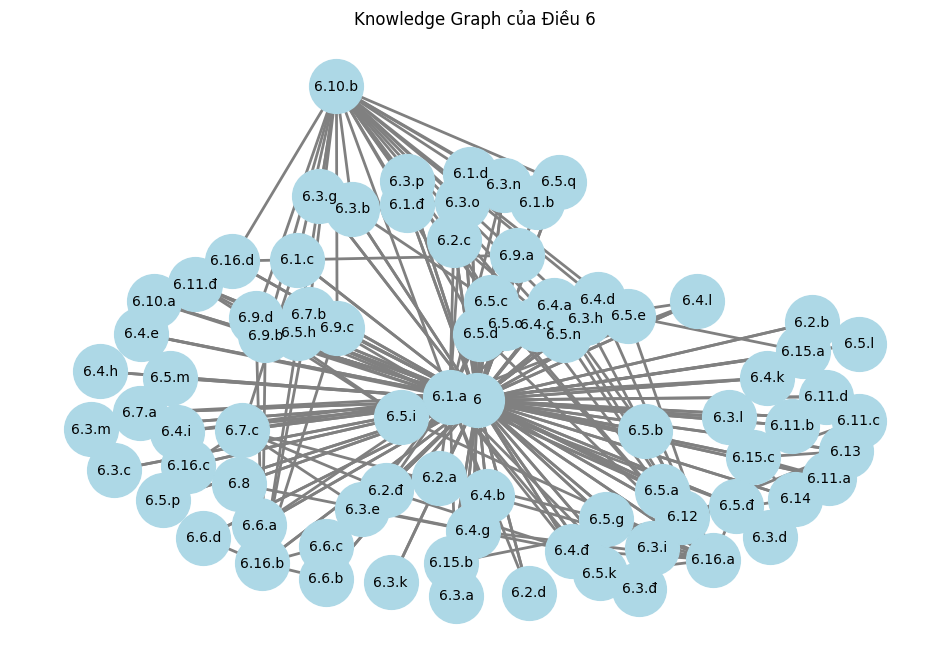

In [ ]:
draw_graph(G)

In [ ]:
import networkx as nx

# Giả sử G là đồ thị đã được tạo và có chứa cạnh giữa "A" và "B"
if G.has_edge("6", "6.10.b"):
    G.remove_edge("6", "6.10.b")
G.remove_edge("6", "6.15.c")
G.remove_edge("6", "6.16.a")
G.remove_edge("6", "6.16.b")
G.remove_edge("6", "6.16.c")
G.remove_edge("6", "6.16.d")

In [ ]:
G.remove_edge("6.15.c", "6")

In [ ]:
G.remove_node("6.10.c")

NetworkXError: The node 6.10.c is not in the digraph.

In [ ]:
G.add_edge("6.5.c", "6.10.b", content="mà ")
G.add_edge("6.5.d", "6.10.b", content="mà ")
G.add_edge("6.5.e", "6.10.b", content="mà ")
G.add_edge("6.5.h", "6.10.b", content="mà ")
G.add_edge("6.5.n", "6.10.b", content="mà ")
G.add_edge("6.5.o", "6.10.b", content="mà ")
G.add_edge("6.5.q", "6.10.b", content="mà ")
G.add_edge("6.7.b", "6.10.b", content="mà ")
G.add_edge("6.9.b", "6.10.b", content="mà ")
G.add_edge("6.9.c", "6.10.b", content="mà ")
G.add_edge("6.9.d", "6.10.b", content="mà ")

In [ ]:
edges = [
    ("6.1.a", "6.10.b"), ("6.1.b", "6.10.b"), ("6.1.c", "6.10.b"),
    ("6.1.d", "6.10.b"), ("6.1.đ", "6.10.b"), ("6.2.c", "6.10.b"),
    ("6.3.b", "6.10.b"), ("6.3.g", "6.10.b"), ("6.3.h", "6.10.b"),
    ("6.3.n", "6.10.b"), ("6.3.o", "6.10.b"), ("6.3.p", "6.10.b"),
    ("6.4.a", "6.10.b"), ("6.4.c", "6.10.b"), ("6.4.d", "6.10.b"),
    ("6.5.c", "6.10.b"), ("6.5.d", "6.10.b"), ("6.5.e", "6.10.b"),
    ("6.5.h", "6.10.b"), ("6.5.n", "6.10.b"), ("6.5.o", "6.10.b"),
    ("6.5.q", "6.10.b"), ("6.7.b", "6.10.b"), ("6.9.b", "6.10.b"),
    ("6.9.c", "6.10.b"), ("6.9.d", "6.10.b")
]
for u, v in edges:
   G.edges[u, v]["content"] = "Nếu "


In [ ]:
case = ""

In [ ]:
for i in neighbors:
   case = case + "Điểm " + i + ": " + G.nodes[i]['content'] + "\n"

In [ ]:
user_question = "Anh A vượt đèn đỏ, vượt quá tốc độ cho phép 15km/h, gây tai nạn nhưng bỏ trốn. Hỏi anh A bị xử phạt như thế nào?"

In [ ]:
response = models.generate_content("Cho câu hỏi: " + user_question + " Bạn hãy cho tôi biết và liệt kê số hiệu và tên của của các điều khoản điểm nào trong Nghị định 168/2024/NĐ-CP mà tôi cung cấp dưới đây liên quan hoặc giống lỗi mà người trong câu hỏi mắc phải mà tôi cung cấp dưới đây được không: \n" + case)

In [ ]:
case

'Điểm 6.1.a: Không chấp hành hiệu lệnh, chỉ dẫn của biển báo hiệu, vạch kẻ đường -  Phạt tiền từ 400.000 đồng đến 600.000 đồng\nĐiểm 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết - Phạt tiền từ 400.000 đồng đến 600.000 đồng\nĐiểm 6.1.c: Không báo hiệu bằng đèn khẩn cấp hoặc không đặt biển cảnh báo “Chú ý xe đỗ” theo quy định trong trường hợp gặp sự cố kỹ thuật (hoặc bất khả kháng khác) buộc phải đỗ xe chiếm một phần đường xe chạy hoặc tại nơi không được phép đỗ xe  -  Phạt tiền từ 400.000 đồng đến 600.000 đồng\nĐiểm 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định;  -  Phạt tiền từ 400.000 đồng đến 600.000 đồng\nĐiểm 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệnh, chữa bệnh, trừ các xe ưu tiên đang đi làm nhiệm vụ theo quy định.  -  Phạt tiền từ 400.000 đồng

In [ ]:
response.text

'Anh A đã vi phạm nhiều lỗi, bao gồm vượt đèn đỏ, chạy quá tốc độ và gây tai nạn rồi bỏ trốn. Cụ thể, anh ta sẽ bị xử phạt theo Nghị định 168/2024/NĐ-CP như sau:\n\n* **Vượt đèn đỏ:**  Điểm 6.9.b: Không chấp hành hiệu lệnh của đèn tín hiệu giao thông - Phạt tiền từ 18.000.000 đồng đến 20.000.000 đồng.\n\n* **Chạy quá tốc độ quy định 15km/h:** Điểm 6.5.đ: Điều khiển xe chạy quá tốc độ quy định từ 10 km/h đến 20 km/h - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng.\n\n* **Gây tai nạn giao thông mà bỏ trốn:** Điểm 6.8: Gây tai nạn giao thông không dừng ngay phương tiện, không giữ nguyên hiện trường, không trợ giúp người bị nạn, không ở lại hiện trường hoặc không đến trình báo ngay với cơ quan công an, Ủy ban nhân dân nơi gần nhất - Phạt tiền từ 16.000.000 đồng đến 18.000.000 đồng. Đồng thời, hành vi gây tai nạn giao thông sẽ bị áp dụng các mức phạt bổ sung tại điểm 6.10.a (Phạt tiền từ 20.000.000 đồng đến 22.000.000 đồng) vì chạy quá tốc độ và vượt đèn đỏ là lỗi trực tiếp gây tai nạn.\n\

In [ ]:
pattern = r"6\.\d+(?:\.[a-zA-ZđĐ])?"

matches = re.findall(pattern, response.text)

print("Các chuỗi trích xuất được:", matches)

Các chuỗi trích xuất được: ['6.9.b', '6.5.đ', '6.000', '6.8', '6.000', '6.10.a']


In [ ]:
pattern = r"\b6\.[1-9]\d*(?:\.[a-zA-ZđĐ0-9]+)?\b"

matches = re.findall(pattern, response.text)
print("Các chuỗi trích xuất được:", matches)

Các chuỗi trích xuất được: ['6.9.b', '6.5.đ', '6.8', '6.10.a']


In [ ]:
matches1 = []

In [ ]:
for i in matches:
    neig = list(G.neighbors(i))
    if(len(neig) > 0):
        uc = ""
        k = 0
        uc = uc + "Điểm " + i + ": " + G.nodes[i]['content'] + ".\n"
        for j in neig:
            # Check if the edge has the 'content' attribute before accessing it
            edge_data = G.get_edge_data(i, j)
            if edge_data and edge_data.get("content") == "trừ các hành vi vi phạm quy định tại ":
                uc = uc + "Điểm " + j + ": " + G.nodes[j]['content'] + ".\n"
                k = k + 1
        if k > 0:
            ucv = models.generate_content("Cho câu hỏi: " + user_question + "Trong các điểm sau thuộc nghị định 168/2024/NĐ-CP chọn và nêu số hiệu của 1 điểm phù hợp và chi tiết nhất với câu hỏi. \n" + uc)
            p = r"\b6\.[1-9]\d*(?:\.[a-zA-ZđĐ0-9]+)?\b"
            m = re.findall(p, ucv.text)
            if len(m) > 0:
                matches1.append(m[0])
        else:
            matches1.append(i)
    else:
        matches1.append(i)

In [ ]:
print(matches1)

['6.9.b', '6.5.đ', '6.8', '6.10.a']


In [ ]:
def make_first_prompt_gt3(query, relevant_passage):
    """
    Tạo prompt cho chatbot dựa trên câu hỏi, đoạn văn tham khảo và ngữ cảnh hội thoại trước đó.

    Args:
        query (str): Câu hỏi của người dùng.
        relevant_passage (str): Đoạn văn tham khảo cần sử dụng.
        context (str): Ngữ cảnh hội thoại trước đó (mặc định là rỗng).

    Returns:
        str: Prompt đã được định dạng để gửi cho mô hình.
    """
    # Loại bỏ các ký tự không cần thiết từ đoạn văn tham khảo
    escaped = relevant_passage.replace("'", "").replace('"', "").replace("\n", " ")

    # Xây dựng prompt dựa trên template
    prompt_template = textwrap.dedent("""
        Bạn là một bot hữu ích và giàu thông tin, trả lời các câu hỏi bằng cách sử dụng văn bản pháp luật từ văn bản tham khảo bên dưới. \
        Đảm bảo trả lời bằng một cách hoàn chỉnh, toàn diện, bao gồm tất cả thông tin cơ bản. \
        Hãy trả lời một cách ngắn gọn, chủ yếu nêu ra số tiền phạt. \
        Lưu ý trong câu trả lời không viết lại câu hỏi. \
        Ví dụ: 4.000.000 đồng rút gọn thành 4tr, hoặc 400.000 đồng rút gọn thành 400k.\
        Và ghi nhớ hãy bôi đậm mức tiền phạt. \
        Biết văn bản pháp luật bạn tham khảo thuộc Nghị định 168/2024/NĐ-CP, và nêu rõ bạn tham khảo những điều nào, khoản nào, điểm nào trong đoạn văn đó. \
        Nếu câu hỏi không nêu cụ thể phương tiện nào thì hãy cho ra thông tin đối với mọi phương tiện như ô tô, xe máy, xe đạp,... \
        Nếu người vi phạm trong câu hỏi mắc nhiều lỗi thì cộng mức phạt trung bình của từng lỗi lại để cho ra mức phạt tổng.. \
        Có một ví dụ sau để hiểu hơn về các yêu cầu: \
        QUESTION: Anh A điều khiển xe trên đường mà trong máu hoặc hơi thở có nồng độ cồn \
        0,3 miligam/1 lít khí thở, chạy quá tốc độ 15km/h. Anh A gây ra tai nạn nhưng không dừng lại, không giữ nguyên hiện trường, bỏ trốn không đến trình báo với cơ quan có thẩm quyền. \
        Hỏi: Anh A bị xử phạt hành chính và trử điểm giấy phép lái xe như nào ? \
        Các bước giải: \
        Nếu áp dụng luật cũ (không phải luật trong văn bản tham khảo )ta có: \
        1, Lỗi nồng độ cồn 0,2 miligam/1 lít khí thở. Trong luật có: "Phạt tiền từ 6.000.000 đồng đến 8.000.000 đồng đối với người điều khiển xe thực hiện hành vi điều khiển xe trên đường mà trong máu hoặc hơi thở có nồng độ cồn \
        nhưng chưa vượt quá 50 miligam/100 mililít máu hoặc chưa vượt quá 0,25 miligam/1 lít khí thở." => Lấy trung bình là (6+8)/2 = 7 triệu đồng \
        2, Lỗi chạy quá tốc độ 15km/h. Trong luật có: "Phạt tiền từ 3.000.000 đồng đến 5.000.000 đồng đối với người điều khiển xe thực hiện hành vi điều khiển xe chạy quá tốc độ quy định từ 10 km/h đến 20 km/h." \
        Luật này có rõ khoảng cho trước nên có thể lấy số tiền là: 3 + ((5-3)/(20-10))*(15-10) = 4 triệu đồng \
        3, Lỗi gây ra tai nạn nhưng không dừng lại, không giữ nguyên hiện trường, bỏ trốn không đến trình báo với cơ quan có thẩm quyền.\
        Trong luật có: " Phạt tiền từ 3.000.000 đồng đến 5.000.000 đồng đối với người điều khiển xe thực hiện một trong các hành vi vi phạm sau: không chấp hành hiệu lệnh của đèn tín hiệu giao thông; \
        không chấp hành hiệu lệnh, hướng dẫn của người điều khiển giao thông hoặc người kiểm soát giao thông."\
        => Không có khoảng cho trước nên lấy trung bình (3+5)/2 = 4 triệu đồng \
        4, Để tìm ra mức trừ điểm lái xe và các hình phạt bổ sung, hãy tìm những điều khoản có đề cập đến các điều khoản ở trên. VD: Lỗi ở bước 3 thuộc điều 5 khoản 6 điểm c.\
        Thì trong luật có đề cập điều 5 khoản 16 điểm d là: "Vi phạm lỗi ở điều 5 khoản 6 điểm c thì bị tước bằng lái xe 2 đến 4 tháng" -> Hình phạt bổ sung cho lỗi gây tai nạn là bị tước bằng 2 đến 4 tháng \
        ANSWER: Số tiền bị phạt: 7 + 4 + 4 = 15 triệu đồng \
                Bị tước quyền sử dụng giấy phép lái xe từ 2 đến 4 tháng \
        Nếu mỗi lỗi có một mức trừ điểm giấy phép lái xe khác nhau chỉ lấy mức trử điểm lớn nhất. \
        Nếu đoạn văn không liên quan đến câu trả lời, hãy trả lời bằng những kiến thức bạn có.

        QUESTION: '{query}'
        PASSAGE: '{relevant_passage}'


        ANSWER:
    """)
    prompt = prompt_template.format(query=query, relevant_passage=escaped)
    return prompt

In [ ]:
relevant_passage = ""

In [ ]:
def neigh(nei):
  passage = ""
  if len(nei) > 0:
    for j in nei:
      passage = passage + " " + G.nodes[j]["content"]+"(Điểm " + j + " " + neigh(list(G.neighbors(j)))
  return passage

In [ ]:
for k in G.neighbors("6"):
  if(G.has_edge("6",k)):
    G.remove_edge(k,"6")

In [ ]:
G.remove_edges_from(incoming_edges)

In [ ]:

for i in  matches1:
  print(i + "\n")
  nei = list(G.neighbors(i))
  for j in nei:
    print(j + " ")


6.9.b

6.10.b 
6.16.b 
6.5.đ

6.16.a 
6.8

6.16.c 
6.10.a

6.11.đ 
6.16.d 


In [ ]:
o = 1
for i in  matches1:
  relevant_passage = relevant_passage + str(o) + ", "
  o = o + 1
  relevant_passage = relevant_passage + "Điểm" + i + ": " + G.nodes[i]["content"] + "."
  nei = list(G.neighbors(i))
  if len(nei) > 0:
    relevant_passage = relevant_passage + " Khi vi phạm điểm này, người vi phạm phải chịu thêm các hình phạt bổ sung sau:\n"
    for j in nei:
        # Check if the edge exists before accessing its data
        if G.has_edge(i, j):
            edge_data = G.get_edge_data(i, j)
            relation = edge_data.get("content", "")
            relevant_passage = relevant_passage + " " + relation + " " + G.nodes[j]["content"] + "(Điểm " + j + ") "

        nei0 = list(G.neighbors(j))
        if len(nei0) > 0:
            relevant_passage = relevant_passage + "và bị "
            for l in nei0:  # Iterate through neighbors of j (nei0)
                # Check if the edge exists before accessing its data
                if G.has_edge(j, l):
                    edge_data = G.get_edge_data(j, l)
                    # Check if edge_data is not None before accessing 'content'
                    if edge_data is not None:
                        relation = edge_data.get("content", "")
                        relevant_passage = relevant_passage + " " + relation + " " + G.nodes[l]["content"] + "(Điểm " + l + ")\n"
        else: relevant_passage = relevant_passage + "\n"
  relevant_passage = relevant_passage + "\n"
relevant_passage

'Điểm6.9.b: Không chấp hành hiệu lệnh của đèn tín hiệu giao thông;- Phạt tiền từ 18.000.000 đồng đến 20.000.000 đồng. Khi vi phạm điểm này, người vi phạm phải chịu thêm các hình phạt bổ sung sau:\n Nếu  gây tai nạn giao thông, phạt tiền từ 20.000.000 đồng đến 22.000.000 đồng(Điểm 6.10.b) và bị 1, Điểm6.9.b: Không chấp hành hiệu lệnh của đèn tín hiệu giao thông;- Phạt tiền từ 18.000.000 đồng đến 20.000.000 đồng. Khi vi phạm điểm này, người vi phạm phải chịu thêm các hình phạt bổ sung sau:\n Nếu  gây tai nạn giao thông, phạt tiền từ 20.000.000 đồng đến 22.000.000 đồng(Điểm 6.10.b) và bị  bị  Trừ điểm giấy phép lái xe 10 điểm(Điểm 6.16.d)\n bị  Trừ điểm giấy phép lái xe 04 điểm(Điểm 6.16.b) \n\n2, Điểm6.5.đ: Điều khiển xe chạy quá tốc độ quy định từ 10 km/h đến 20 km/h;- Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng. Khi vi phạm điểm này, người vi phạm phải chịu thêm các hình phạt bổ sung sau:\n bị  Trừ điểm giấy phép lái xe 02 điểm(Điểm 6.16.a) \n\n3, Điểm6.8: Phạt tiền từ 16.000.000 đồ

In [ ]:
import textwrap

In [ ]:
prompt = make_first_prompt_gt3(user_question, relevant_passage)
answer = models.generate_content(prompt)

In [ ]:
answer.text

'Số tiền bị phạt: **40tr** - **44tr** (Trung bình **42tr**)\n\n* Vượt đèn đỏ gây tai nạn: **20tr - 22tr** (Điểm 6.9.b, 6.10.b - NĐ 168/2024/NĐ-CP)\n* Vượt quá tốc độ 10-20km/h: **4tr - 6tr** (Điểm 6.5.đ - NĐ 168/2024/NĐ-CP)\n* Gây tai nạn bỏ trốn: **16tr - 18tr** (Điểm 6.8 - NĐ 168/2024/NĐ-CP)\n\nTrừ 10 điểm giấy phép lái xe (Điểm 6.16.d - NĐ 168/2024/NĐ-CP).\n'

In [ ]:
from IPython.display import Markdown

In [ ]:
Markdown(answer.text)

Số tiền bị phạt: **40tr** - **44tr** (Trung bình **42tr**)

* Vượt đèn đỏ gây tai nạn: **20tr - 22tr** (Điểm 6.9.b, 6.10.b - NĐ 168/2024/NĐ-CP)
* Vượt quá tốc độ 10-20km/h: **4tr - 6tr** (Điểm 6.5.đ - NĐ 168/2024/NĐ-CP)
* Gây tai nạn bỏ trốn: **16tr - 18tr** (Điểm 6.8 - NĐ 168/2024/NĐ-CP)

Trừ 10 điểm giấy phép lái xe (Điểm 6.16.d - NĐ 168/2024/NĐ-CP).


Ngày 1/4/**2025**

Tạo result


In [ ]:
import docx
import re

# Đọc tài liệu Word
doc = docx.Document('/content/Loaibo_mocnoi.docx')  # Thay bằng đường dẫn thực tế đến file của bạn

# Tách văn bản thành mảng các chuỗi (mỗi đoạn văn là một phần tử)
lines = [paragraph.text.strip() for paragraph in doc.paragraphs if paragraph.text.strip()]

# Khởi tạo biến để theo dõi Điều và Khoản hiện tại
current_article = None
current_section = None

# Dictionary để theo dõi các khoản và các điểm bên trong chúng
sections_dict = {}

# Mảng để lưu các số hiệu của điểm và khoản không chứa điểm
result = []

# Định nghĩa các mẫu regex để nhận diện Điều, Khoản, và Điểm
article_pattern = r'^Điều\s+(\d+)\.'
section_pattern = r'^(\d+)\.'
point_pattern = r'^([a-z])\)'

# Duyệt qua từng chuỗi trong mảng lines
for line in lines:
    # Kiểm tra nếu dòng là một Điều
    article_match = re.match(article_pattern, line)
    if article_match:
        current_article = article_match.group(1)  # Cập nhật số của Điều
        current_section = None  # Đặt lại Khoản khi chuyển sang Điều mới
        continue

    # Kiểm tra nếu dòng là một Khoản
    section_match = re.match(section_pattern, line)
    if section_match:
        current_section = section_match.group(1)  # Cập nhật số của Khoản
        section_id = f"{current_article}.{current_section}"
        # Khởi tạo danh sách điểm cho khoản này nếu chưa có
        if section_id not in sections_dict:
            sections_dict[section_id] = []
        continue

    # Kiểm tra nếu dòng là một Điểm
    point_match = re.match(point_pattern, line)
    if point_match and current_article and current_section:
        point_letter = point_match.group(1)  # Lấy chữ cái của Điểm
        point_id = f"{current_article}.{current_section}.{point_letter}"
        result.append(point_id)  # Thêm số hiệu của Điểm vào mảng kết quả
        section_id = f"{current_article}.{current_section}"
        # Thêm Điểm vào danh sách của Khoản tương ứng
        sections_dict[section_id].append(point_id)

# Kiểm tra các khoản không chứa điểm
for section_id, points in sections_dict.items():
    if not points:  # Nếu danh sách điểm rỗng
        result.append(section_id)  # Thêm số hiệu của Khoản không chứa điểm

# Sắp xếp mảng kết quả (tùy chọn, để dễ đọc)
result.sort()

# In mảng các số hiệu
print("Mảng các số hiệu của điểm và khoản không chứa điểm:")
for item in result:
    print(item)

Mảng các số hiệu của điểm và khoản không chứa điểm:
10.1.b
11.1.b
12.10
12.15
12.16.a
12.16.b
12.17
12.2.e
12.8
13.10.a
13.10.b
13.11.a
13.11.b
13.11.c
13.11.d
13.12
13.13.a
13.13.b
13.13.c
13.2.a
13.9.a
14.5.a
14.5.b
14.6.a
14.6.b
14.7
14.8.a
14.8.b
16.4.a
16.4.b
16.5.a
16.5.b
16.6
17.5
18.10
18.11
18.12
18.2.d
18.3.a
20.10.a
20.10.b
20.10.c
20.10.d
20.2
20.5.g
20.5.h
20.6.d
20.9
21.11
21.12
21.13.a
21.13.b
21.13.c
21.13.d
21.6
21.8
22.1.b
22.4
22.5
22.6.a
22.6.b
23.5
23.6
23.7.a
23.7.b
24.3
25.2
26.11
26.12
26.13.a
26.13.b
26.13.c
26.13.d
26.14.a
26.14.b
26.4.b
27.2
27.4
28.3
28.4.a
28.4.b
29.4
3.2.c
3.3.a
3.4.a
30.3
31.3
31.4
32.10
32.11.b
32.11.c
32.13.a
32.13.b
32.13.c
32.14.a
32.14.b
32.14.c
32.14.d
32.14.e
32.14.g
32.14.i
32.15
32.16.a
32.16.b
32.17.c
32.17.d
32.17.e
32.17.g
32.18.a
32.18.b
32.18.c
32.18.d
32.19.a
32.19.b
32.19.c
32.19.d
32.19.e
32.19.g
32.19.h
32.19.i
32.19.k
32.19.l
32.20
32.21.a
32.21.b
32.21.c
32.21.d
32.21.e
32.21.g
32.21.h
32.4
32.5
32.6
32.7.e
32.7.g
32.9

In [ ]:
if "47.11" in result:
    result.remove("47.11")
print(result)  # Kết quả: ["47.1", "47.2"]

['10.1.b', '11.1.b', '12.10', '12.15', '12.16.a', '12.16.b', '12.17', '12.2.e', '12.8', '13.10.a', '13.10.b', '13.11.a', '13.11.b', '13.11.c', '13.11.d', '13.12', '13.13.a', '13.13.b', '13.13.c', '13.2.a', '13.9.a', '14.5.a', '14.5.b', '14.6.a', '14.6.b', '14.7', '14.8.a', '14.8.b', '16.4.a', '16.4.b', '16.5.a', '16.5.b', '16.6', '17.5', '18.10', '18.11', '18.12', '18.2.d', '18.3.a', '20.10.a', '20.10.b', '20.10.c', '20.10.d', '20.2', '20.5.g', '20.5.h', '20.6.d', '20.9', '21.11', '21.12', '21.13.a', '21.13.b', '21.13.c', '21.13.d', '21.6', '21.8', '22.1.b', '22.4', '22.5', '22.6.a', '22.6.b', '23.5', '23.6', '23.7.a', '23.7.b', '24.3', '25.2', '26.11', '26.12', '26.13.a', '26.13.b', '26.13.c', '26.13.d', '26.14.a', '26.14.b', '26.4.b', '27.2', '27.4', '28.3', '28.4.a', '28.4.b', '29.4', '3.2.c', '3.3.a', '3.4.a', '30.3', '31.3', '31.4', '32.10', '32.11.b', '32.11.c', '32.13.a', '32.13.b', '32.13.c', '32.14.a', '32.14.b', '32.14.c', '32.14.d', '32.14.e', '32.14.g', '32.14.i', '32.15', 

In [ ]:
result.append("48.5")

**Code** chương II

In [ ]:
import re
import networkx as nx
from docx import Document

# Khởi tạo đồ thị có hướng
G = nx.DiGraph()

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
section_pattern = r"Mục\s+(\d+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
# penalty_pattern = r"Phạt tiền từ (\d{1,3}(?:\.\d{3})*) đồng đến (\d{1,3}(?:\.\d{3})*) đồng đối với (.+?)(?=\s*thực hiện|:|$)"
penalty_pattern = re.compile(r"(Phạt tiền.*?)(?=\s*thực hiện)", re.DOTALL)
penalty_pattern_1 = re.compile(r"(Phạt tiền.*?)(?=\s*đối với)", re.DOTALL)
# Hàm tìm kiếm
def extract_fine(text):
    # match = re.search(penalty_pattern, text)
    match = penalty_pattern.search(text)
    if match:
       # fine_start = match.group(1)
       # fine_end = match.group(2)
      # target = match.group(3)
        #return f"Phạt tiền từ {fine_start} đồng đến {fine_end} đồng đối với {target}"
        return match.group(1)
    return "Không tìm thấy mức phạt"
# Mảng result để loại bỏ các nút (giả sử rỗng nếu không cung cấp)
def  extract_fine_1(text):
      # match = re.search(penalty_pattern, text)
    match = penalty_pattern_1.search(text)
    if match:
       # fine_start = match.group(1)
       # fine_end = match.group(2)
      # target = match.group(3)
        #return f"Phạt tiền từ {fine_start} đồng đến {fine_end} đồng đối với {target}"
        return match.group(1)
    return "Không tìm thấy mức phạt"
def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_section = None
    current_article = None
    current_clause = None
    current_penalty = None
    clause_lines = []
    clause_num = None
    current_clause_content = None
    Ck = False

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Chương
        chapter_match = re.match(chapter_pattern, line)
        if chapter_match:
            chapter_num = chapter_match.group(1)
            chapter_title = chapter_match.group(2)
            chapter_node = f"Chương {chapter_num}"
            G.add_node(chapter_node, content=chapter_title)
            current_chapter = chapter_node
            continue

        # Phát hiện Mục
        section_match = re.match(section_pattern, line)
        if section_match:
        #    process_previous_clause()
            section_num = section_match.group(1)
            section_title = section_match.group(2)
            section_node = f"Mục {section_num}"
            G.add_node(section_node, content=section_title)
            if current_chapter:
                G.add_edge(current_chapter, section_node)
            current_section = section_node
            if Ck:
                if current_clause:
                   if current_clause not in result:
                       G.add_node(current_clause, content=f"{current_clause_content} - {current_penalty}")
                       G.add_edge(current_article, current_clause)
            Ck = False
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(article_node, content=article_title)
            if current_section:
                G.add_edge(current_section, article_node)
            if Ck:
                if current_clause:
                   if current_clause not in result:
                       G.add_node(current_clause, content=current_clause_content)
                       G.add_edge(current_article, current_clause)
            current_article = article_node
            Ck = False
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                pn = re.compile(
                r"(Phạt tiền.*?)(?=\s*thực hiện)\s*thực hiện\s*(.*)",
                re.DOTALL
                )
                matcha = pn.search(clause_title)
                if matcha:
                   clause_content  = matcha.group(2).strip()
                clause_node = f"{article_node}.{clause_num}"
                if Ck:
                    if current_clause:
                       if current_clause not in result:
                          G.add_node(current_clause, content=current_clause_content)
                          G.add_edge(current_article, current_clause)
                current_clause = clause_node
                current_clause_content = clause_title
                current_penalty = extract_fine(clause_title)
                if current_penalty == "Không tìm thấy mức phạt":
                    current_penalty = extract_fine_1(clause_title)
                Ck = True
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            if current_penalty != "Không tìm thấy mức phạt":
                subclause_node = f"{current_clause}.{subclause_num}"
                if subclause_node not in result:
                   G.add_node(subclause_node, content=f"{subclause_title} - {current_penalty}")
            else:
                subclause_node = f"{current_clause}.{subclause_num}"
                if subclause_node not in result:
                   G.add_node(subclause_node, content=subclause_title)
            if current_article and subclause_node not in result:
                G.add_edge(current_article, subclause_node)
            Ck = False
            continue


# Ví dụ sử dụng
doc_path = "/content/Chuong2_Cu_the_168.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Code chương I

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"


def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Chương
        chapter_match = re.match(chapter_pattern, line)
        if chapter_match:
            chapter_num = chapter_match.group(1)
            chapter_title = chapter_match.group(2)
            chapter_node = f"Chương {chapter_num}"
            G.add_node(chapter_node, content=chapter_title)
            current_chapter = chapter_node
            continue


        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(article_node, content=article_title)
            if current_chapter:
                G.add_edge(current_chapter, article_node)
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{article_node}.{clause_num}"
                if clause_node not in result:
                   G.add_node(clause_node, content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(current_article, clause_node)
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(subclause_node, content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(current_clause, subclause_node)
            continue

# Ví dụ sử dụng
doc_path = "/content/Chuong1_Cu_the_168.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Code xử lý móc nối chương II

Code thử nghiệm


Code xử lý ngoại lệ chương II


In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    current_penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if article not in G:
                G.add_node(article, content=article_title)
                id = int(current_article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                   'penalty': current_penalty
                 }
            check = False
            current_article = article
            current_clause = None  # Reset clause when new article starts
            penalty = None
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            clause_content = line.split(clause_match.group(0), 1)[1].strip()
            #penalty_match = re.search(r'Phạt tiền từ \d+\.\d+ đồng đến \d+\.\d+ đồng', line)
            #penalty = penalty_match.group() if penalty_match else None
            pn = re.compile(
            r"(Phạt tiền.*?)(?=\s*thực hiện)\s*thực hiện\s*(.*)",
            re.DOTALL
            )
            matcha_latte = pn.search(clause_content)
            if matcha_latte:
              content  = matcha_latte.group(2).strip()
            if current_clause:
              if check:
                if current_content:
                   structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                   'penalty': current_penalty
                   }
            current_clause = clause
            current_content = content
            current_penalty = extract_fine(clause_content)
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
                'penalty': current_penalty
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    ck = False
    for point, data in list(structure.items()):
                content = data['content']
                penalty = data['penalty']

                # Check for exception phrases
                exception_phrases = [
                    "trừ hành vi vi phạm quy định tại",
                    "trừ các hành vi vi phạm quy định tại",
                    "trừ trường hợp quy định tại"

                ]
                exception_phrase = None
                for phrase in exception_phrases:
                    if phrase in content:
                        exception_phrase = phrase
                        break

                if exception_phrase:
                    # Split content into description and exceptions
                    description, exceptions = content.split(exception_phrase, 1)
                    description = description.strip()
                    exceptions = exceptions.strip()

                    exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        exceptions
                    )
                    points = list(re.finditer(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        exceptions
                     ))
                    last_match_end = points[-1].end()
                    remaining_text = exceptions[last_match_end:].strip()
                    if remaining_text:
                      node_content = f"{description} {remaining_text} - {penalty}" if penalty else f"{description} {remaining_text}"
                    else:
                      node_content = f"{description} - {penalty}" if penalty else description
                    node_id = point
                    nodes[node_id] = node_content
                    for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = False
                                current_art = art
                                current_cls = None

                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = True
                                current_cls = cls
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))
                                ck = False

    return nodes, edges

def main(file_path):
    # Extract and process the document
    text_lines = extract_text_from_docx(file_path)
    structure = parse_document(text_lines)
    nodes, edges = process_exceptions(structure)

    # Output results
    print("Nodes:")
    for node_id, content in nodes.items():
        print(f"{node_id}: {content}")
        if node_id not in G:
            G.add_node(node_id, content=content)
      #  parts = node_id.split(".")
      #  before_first_dot = parts[0]
      #  if before_first_dot in G:
      #   G.add_edge(before_first_dot, node_id)

    print("\nEdges:")
    for edge_from, edge_list in edges.items():
        for edge_to, label in edge_list:
          if edge_from in G:
            if not G.has_edge(edge_from, edge_to):
              G.add_edge(edge_from, edge_to, content=label)
              print(f"From {edge_from} to {edge_to} with label '{label}'")
  #  print(text_lines)

if __name__ == "__main__":
    # Replace with the actual path to your DOCX file
    file_path = '/content/Loaibo_mocnoi_chuong2.docx'
    main(file_path)

Nodes:
6.1.a: Không chấp hành hiệu lệnh, chỉ dẫn của biển báo hiệu, vạch kẻ đường, - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
6.1.c: Không báo hiệu bằng đèn khẩn cấp hoặc không đặt biển cảnh báo “Chú ý xe đỗ” theo quy định trong trường hợp gặp sự cố kỹ thuật (hoặc bất khả kháng khác) buộc phải đỗ xe chiếm một phần đường xe chạy hoặc tại nơi không được phép đỗ xe, điều c - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
6.2.a: Chuyển làn đường không đúng nơi cho phép hoặc không có tín hiệu báo trước hoặc chuyển làn đường không đúng quy định “mỗi lần chuyển làn đường chỉ được phép chuyển sang một làn đường liền kề”, ; - Phạt tiền từ 600.000 đồng đến 800.000 đồng đối với người điều khiển xe
6.2.c: Không tuân thủ các quy định về nhường đường tại nơi đường bộ giao nhau, , o; - Phạt tiền từ 600.000 đồng đến 800.000 đồng đối với người điều khiển xe
6.2.đ: Dừng xe không sát theo lề đường, vỉa hè phía bên phải theo chiều đi hoặc bánh xe gần n

22/4/2025


Code cho "Thực hiện hành vi vi phạm tại"

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if article not in G:
                G.add_node(article, content=article_title)
                id = int(current_article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            check = False
            current_article = article
            current_clause = None  # Reset clause when new article starts
            penalty = None
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            content = line.split(clause_match.group(0), 1)[1].strip()
            penalty_match = re.search(r'Phạt tiền từ \d+\.\d+ đồng đến \d+\.\d+ đồng', line)
            penalty = penalty_match.group() if penalty_match else None
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            current_clause = clause
            current_content = content
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    ck = False
    for point, data in list(structure.items()):
                  content = data['content']
                  exception_phrase = "Hình phạt bổ sung"
                # Check for exception phrases
                  if content.startswith("Thực hiện hành vi quy định tại"):
                   match = re.search(r"^Thực\s+hiện\s+hành\s+vi\s+quy\s+định\s+tại\s+(.*)", content)
                   if match:
                      exceptions = match.group(1)
                      exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        exceptions
                        )
                      points = list(re.finditer(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        exceptions
                        ))
                      last_match_end = points[-1].end()
                      remaining_text = exceptions[last_match_end:].strip()
                      if remaining_text[:2] == "ấy":
                        node_content = f"bị trừ điểm gi{remaining_text}"
                      else:
                        node_content = f"{remaining_text}"
                      node_id = point
                      nodes[node_id] = node_content
                      for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = False
                                current_art = art
                                current_cls = None
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = True
                                current_cls = cls
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))
                                ck = False

    return nodes, edges

def main(file_path):
    # Extract and process the document
    text_lines = extract_text_from_docx(file_path)
    structure = parse_document(text_lines)
    nodes, edges = process_exceptions(structure)

    # Output results
    print("Nodes:")
    for node_id, content in nodes.items():
        print(f"{node_id}: {content}")
        if node_id not in G:
            G.add_node(node_id, content=content)
  #      parts = node_id.split(".")
   #     before_first_dot = parts[0]
    #    if before_first_dot in G:
     #       G.add_edge(before_first_dot, node_id)

    print("\nEdges:")
    for edge_from, edge_list in edges.items():
        for edge_to, label in edge_list:
          if edge_from in G:
             if not G.has_edge(edge_from, edge_to):
               G.add_edge(edge_from, edge_to, content=label)
               print(f"From {edge_from} to {edge_to} with label '{label}'")
  #  print(text_lines)

if __name__ == "__main__":
    # Replace with the actual path to your DOCX file
    file_path = '/content/Loaibo_mocnoi_chuong2.docx'
    main(file_path)

Nodes:
6.15.a: còn bị tịch thu thiết bị phát tín hiệu ưu tiên lắp đặt, sử dụng trái quy định;
6.15.b: bị tước quyền sử dụng giấy phép lái xe từ 10 tháng đến 12 tháng;
6.15.c: bị tước quyền sử dụng giấy phép lái xe từ 22 tháng đến 24 tháng.
6.16.a: bị trừ điểm giấy phép lái xe 02 điểm;
6.16.b: bị trừ điểm giấy phép lái xe 04 điểm;
6.16.c: bị trừ điểm giấy phép lái xe 06 điểm;
6.16.d: bị trừ điểm giấy phép lái xe 10 điểm.
7.12.a: còn bị tịch thu thiết bị phát tín hiệu ưu tiên lắp đặt, sử dụng trái quy định;
7.12.b: bị tước quyền sử dụng giấy phép lái xe từ 10 tháng đến 12 tháng;
7.12.c: bị tước quyền sử dụng giấy phép lái xe từ 22 tháng đến 24 tháng.
7.13.a: bị trừ điểm giấy phép lái xe 02 điểm;
7.13.b: bị trừ điểm giấy phép lái xe 04 điểm;
7.13.c: bị trừ điểm giấy phép lái xe 06 điểm;
7.13.d: bị trừ điểm giấy phép lái xe 10 điểm.
12.16.a: buộc phá dỡ các vật che khuất biển báo hiệu đường bộ, đèn tín hiệu giao thông;
12.16.b: buộc khôi phục lại tình trạng ban đầu đã bị thay đổi do vi phạ

Code cho mở đầu có tên là "Ngoài việc"

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if article not in G:
                G.add_node(article, content=article_title)
                id = int(article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            check = False
            current_clause = None  # Reset clause when new article starts
            current_article = article
            penalty = None
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            content = line.split(clause_match.group(0), 1)[1].strip()
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            current_clause = clause
            current_content = content
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    ck = False
    for point, data in list(structure.items()):
                  content = data['content']
                  exception_phrase = "Hình phạt bổ sung"
                # Check for exception phrases
                  if content.startswith("Ngoài việc"):
                      exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                        )
                      points = list(re.finditer(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                        ))
                      last_match_end = points[-1].end()
                      remaining_text = content[last_match_end:].strip()
                      if remaining_text[:2] == "ấy":
                        node_content = f"bị trừ điểm gi{remaining_text}"
                      else:
                        node_content = f"{remaining_text}"
                      node_id = point
                      nodes[node_id] = node_content
                      for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = False
                                current_art = art
                                current_cls = None
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = True
                                current_cls = cls
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))
                                ck = False


    return nodes, edges

def main(file_path):
    # Extract and process the document
    text_lines = extract_text_from_docx(file_path)
    structure = parse_document(text_lines)
    nodes, edges = process_exceptions(structure)

    # Output results
    print("Nodes:")
    for node_id, content in nodes.items():
        print(f"{node_id}: {content}")
        if node_id not in G:
            G.add_node(node_id, content=content)
   #     parts = node_id.split(".")
    #    before_first_dot = parts[0]
     #   if before_first_dot in G:
      #      G.add_edge(before_first_dot, node_id)

    print("\nEdges:")
    for edge_from, edge_list in edges.items():
        for edge_to, label in edge_list:
          if edge_from in G:
             if not G.has_edge(edge_from, edge_to):
               G.add_edge(edge_from, edge_to, content=label)
               print(f"From {edge_from} to {edge_to} with label '{label}'")
    print(text_lines)

if __name__ == "__main__":
    # Replace with the actual path to your DOCX file
    file_path = '/content/Loaibo_mocnoi_chuong21.docx'
    main(file_path)

Nodes:
12.15: nếu là người điều khiển phương tiện còn bị áp dụng hình thức xử phạt bổ sung tước quyền sử dụng giấy phép lái xe từ 22 tháng đến 24 tháng.
12.17: bị trừ điểm giấy phép lái xe 02 điểm.
13.12: bị thu hồi chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) không do cơ quan có thẩm quyền cấp hoặc không đúng số khung, số động cơ (số máy) của xe, giấy chứng nhận, tem kiểm định an toàn kỹ thuật và bảo vệ môi trường không do cơ quan có thẩm quyền cấp.
14.7: bị thu hồi chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) không đúng số khung, số động cơ (số máy) của xe hoặc khôn

In [ ]:
G.add_node("40.2.b", content = "Có từ 02 lượt đăng kiểm viên trở lên bị xử phạt trong thời hạn 12 tháng tính từ lần vi phạm đầu tiên - Phạt tiền từ 10.000.000 đồng đến 15.000.000 đồng đối với cơ sở đăng kiểm")

In [ ]:
G.add_edge("40.1","40.2.b", content = "Hình phạt bổ sung")

Code xử lý trường hợp gây ra tai nạn giao thông

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if current_article not in G:
                G.add_node(article, content=article_title)
                id = int(article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            current_article = article
            current_clause = None  # Reset clause when new article starts
            penalty = None
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            content = line.split(clause_match.group(0), 1)[1].strip()
            penalty_match = re.search(r'Phạt tiền từ \d+\.\d+ đồng đến \d+\.\d+ đồng', line)
            penalty = penalty_match.group() if penalty_match else None
            current_clause = clause
            current_content = content
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
                'penalty': penalty
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    ck = False
    for point, data in list(structure.items()):
                content = data['content']
                penalty = data['penalty']

                # Check for exception phrases
                exception_phrase = "Nếu gây tai nạn giao thông,"
                if content.startswith("Vi phạm quy định tại"):
                    exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                    )
                    node_content = f"{penalty}"
                    node_id = point
                    nodes[node_id] = node_content
                    for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = False
                                current_art = art
                                current_cls = None
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = True
                                current_cls = cls
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))
                                ck = False

    return nodes, edges

def main(file_path):
    # Extract and process the document
    text_lines = extract_text_from_docx(file_path)
    structure = parse_document(text_lines)
    nodes, edges = process_exceptions(structure)

    # Output results
    print("Nodes:")
    G.add_node("6.10.b", content = "Phạt tiền từ 20.000.000 đồng đến 22.000.000 đồng đối với người điều khiển xe")
    G.add_node("7.10.b", content = "Phạt tiền từ 10.000.000 đồng đến 14.000.000 đồng đối với người điều khiển xe")
    G.add_node("8.8.d", content = "Phạt tiền từ 14.000.000 đồng đến 16.000.000 đồng đối với người điều khiển xe")
    G.add_node("8.9.e", content = "Phạt tiền từ 18.000.000 đồng đến 20.000.000 đồng đối với người điều khiển xe")
    G.add_edge("6","6.10.b")
    G.add_edge("7","7.10.b")
    G.add_edge("8","8.8.d")
    G.add_edge("8","8.9.e")

    print("\nEdges:")
    for edge_from, edge_list in edges.items():
        for edge_to, label in edge_list:
          if edge_from in G:
             if not G.has_edge(edge_from, edge_to):
               G.add_edge(edge_from, edge_to, content=label)
               print(f"From {edge_from} to {edge_to} with label '{label}'")
  #  print(text_lines)

if __name__ == "__main__":
    # Replace with the actual path to your DOCX file
    file_path = '/content/Loaibo_mocnoi_chuong21.docx'
    main(file_path)

Nodes:

Edges:
From 6.5.c to 6.10.b with label 'Nếu gây tai nạn giao thông,'


In [ ]:
G.add_node("6.12", content = "Phạt tiền từ 40.000.000 đồng đến 50.000.000 đồng đối với người điều khiển xe thực hiện hành vi điều khiển xe lạng lách, đánh võng trên đường bộ; chạy quá tốc độ đuổi nhau trên đường bộ; dùng chân điều khiển vô lăng xe khi xe đang chạy trên đường bộ.")

In [ ]:
G.add_edge("6","6.12")

In [ ]:
G.add_node("6.13", content = "Phạt tiền từ 50.000.000 đồng đến 70.000.000 đồng đối với người điều khiển xe")
G.add_edge("6","6.13")
neighbors_ed = list(G.neighbors("6.12"))
if neighbors_ed:
  for nei in neighbors_ed:
     G.add_edge(nei, "6.13", content = "Nếu gây tai nạn giao thông,")
else:
  G.add_edge("6.12", "6.13", content = "Nếu gây tai nạn giao thông,")

In [ ]:
G.add_node("21.1")

In [ ]:
G.add_node("21.11", content = "Phạt tiền từ 30.000.000 đồng đến 35.000.000 đồng")
G.add_edge("21","21.11")
G.add_edge("21.1.a", "21.11", content = "Nếu gây tai nạn giao thông,")
G.add_edge("21.1.b", "21.11", content = "Nếu gây tai nạn giao thông,")
G.add_edge("21.10.a", "21.11", content = "Nếu gây tai nạn giao thông,")
G.add_edge("21.10.b", "21.11", content = "Nếu gây tai nạn giao thông,")
G.add_edge("21.8.đ", "21.11", content = "Nếu gây tai nạn giao thông")

Code xử phạt hình phạt bổ sung cơ sở đào tạo sát hạch lái xe

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if article not in G:
                G.add_node(article, content=article_title)
                id = int(article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            check = False
            current_clause = None  # Reset clause when new article starts
            current_article = article
            penalty = None
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            content = line.split(clause_match.group(0), 1)[1].strip()
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            current_clause = clause
            current_content = content
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    ck = False
    for point, data in list(structure.items()):
                  content = data['content']
                  exception_phrase = "Hình phạt bổ sung"
                # Check for exception phrases
                  pattern = r"^(?:Cơ\s+sở\s+đào\s+tạo\s+lái\s+xe|Trung\s+tâm\s+sát\s+hạch\s+lái\s+xe)\s+(.*)"
                  match = re.match(pattern, content)
                  if match:
                      text = match.group(1).strip()
                      exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                        )
                      points = list(re.finditer(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                        ))
                      last_match_end = points[-1].end()
                      remaining_text = content[last_match_end:].strip()
                      if remaining_text[:2] == "ấy":
                        node_content = f"bị trừ điểm gi{remaining_text}"
                      else:
                        node_content = f"{remaining_text}"
                      node_id = point
                      nodes[node_id] = node_content
                      for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = False
                                current_art = art
                                current_cls = None
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                current_cls = cls
                                ck = True
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))
                                ck = False

    return nodes, edges

def main(file_path):
    # Extract and process the document
    text_lines = extract_text_from_docx(file_path)
    structure = parse_document(text_lines)
    nodes, edges = process_exceptions(structure)

    # Output results
    print("Nodes:")
    for node_id, content in nodes.items():
        print(f"{node_id}: {content}")
        if node_id not in G:
            G.add_node(node_id, content=content)
      #  parts = node_id.split(".")
       # before_first_dot = parts[0]
       # if before_first_dot in G:
          #  G.add_edge(before_first_dot, node_id)

    print("\nEdges:")
    for edge_from, edge_list in edges.items():
        for edge_to, label in edge_list:
          if edge_from in G:
             if not G.has_edge(edge_from, edge_to):
                G.add_edge(edge_from, edge_to, content=label)
                print(f"From {edge_from} to {edge_to} with label '{label}'")
   # print(text_lines)

if __name__ == "__main__":
    # Replace with the actual path to your DOCX file
    file_path = '/content/Loaibo_mocnoi_chuong21.docx'
    main(file_path)

Nodes:
39.9.a: bị đình chỉ tuyển sinh từ 01 tháng đến 03 tháng;
39.9.b: bị đình chỉ tuyển sinh từ 02 tháng đến 04 tháng;
39.9.c: bị tước quyền sử dụng giấy phép sát hạch từ 01 tháng đến 03 tháng;
39.9.đ: bị tước quyền sử dụng giấy phép sát hạch từ 02 tháng đến 04 tháng.

Edges:


Code xử lý phần khác biệt thuộc Điều 32 chương II

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if article not in G:
                G.add_node(article, content=article_title)
                id = int(current_article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            current_article = article
            current_clause = None  # Reset clause when new article starts
            penalty = None
            check = False
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            content = line.split(clause_match.group(0), 1)[1].strip()
            penalty_match = re.search(r"^(.*?)\s*thực hiện một trong các hành vi vi phạm sau đây", line, flags=re.IGNORECASE)
            penalty = penalty_match.group(1).strip() if penalty_match else None
            if penalty:
               penalty = re.sub(r'^\s*\d+\.\s*', '', penalty)
            current_clause = clause
            current_content = content
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
                'penalty': penalty
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    for point, data in list(structure.items()):
                content = data['content']
                penalty = data['penalty']
                exception_phrase = "Xử phạt chủ phương tiện"
                # Check for exception phrases
                if content.startswith("Giao phương tiện hoặc để cho người làm công"):
                    description = "Giao phương tiện hoặc để cho người làm công, người đại diện điều khiển phương tiện thực hiện hành vi vi phạm hoặc trực tiếp điều khiển phương tiện thực hiện hành vi vi phạm"
                    exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                    )
                    node_content = f"{description} - {penalty}" if penalty else f"{description}"
                    node_id = point
                    nodes[node_id] = node_content
                    mid = len(exception_points)//2
                    for exception in exception_points[:mid]:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                current_art = art
                                current_cls = None
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                current_cls = cls
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))

    return nodes, edges

def main(file_path):
    # Extract and process the document
    text_lines = extract_text_from_docx(file_path)
    structure = parse_document(text_lines)
    nodes, edges = process_exceptions(structure)

    # Output results
    print("Nodes:")
    for node_id, content in nodes.items():
        print(f"{node_id}: {content}")
        if node_id not in G:
            G.add_node(node_id, content=content)
   #     parts = node_id.split(".")
     #   before_first_dot = parts[0]
      #  if before_first_dot in G:
         # G.add_edge(before_first_dot, node_id)

    print("\nEdges:")
    for edge_from, edge_list in edges.items():
        for edge_to, label in edge_list:
          if edge_from in G:
             if not G.has_edge(edge_from, edge_to):
               G.add_edge(edge_from, edge_to, content=label)
               print(f"From {edge_from} to {edge_to} with label '{label}'")
  #  print(text_lines)

if __name__ == "__main__":
    # Replace with the actual path to your DOCX file
    file_path = '/content/Dieu_32_va_cac_dieu_thu_cong.docx'
    main(file_path)

Nodes:
32.7.đ: Giao phương tiện hoặc để cho người làm công, người đại diện điều khiển phương tiện thực hiện hành vi vi phạm hoặc trực tiếp điều khiển phương tiện thực hiện hành vi vi phạm - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 8.000.000 đồng đến 12.000.000 đồng đối với tổ chức là chủ xe ô tô (kể cả rơ moóc và sơ mi rơ moóc), xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng và các loại xe tương tự xe ô tô
32.7.e: Giao phương tiện hoặc để cho người làm công, người đại diện điều khiển phương tiện thực hiện hành vi vi phạm hoặc trực tiếp điều khiển phương tiện thực hiện hành vi vi phạm - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 8.000.000 đồng đến 12.000.000 đồng đối với tổ chức là chủ xe ô tô (kể cả rơ moóc và sơ mi rơ moóc), xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng và các loại xe tương tự xe ô tô
32.7.g: Giao phương tiện hoặc để cho ngườ

In [ ]:
G.add_node("32.5", content = "Phạt tiền từ 800.000 đồng đến 1.200.000 đồng trên mỗi người vượt quá quy định được phép chở của phương tiện nhưng tổng mức phạt tiền tối đa không vượt quá 75.000.000 đồng đối với chủ phương tiện là cá nhân, từ 1.600.000 đồng đến 2.400.000 đồng trên mỗi người vượt quá quy định được phép chở của phương tiện nhưng tổng mức phạt tiền tối đa không vượt quá 150.000.000 đồng đối với chủ phương tiện là tổ chức giao phương tiện hoặc để cho người làm công, người đại diện điều khiển phương tiện thực hiện hành vi vi phạm hoặc trực tiếp điều khiển phương tiện thực hiện hành vi vi phạm")

In [ ]:
if G.has_node("20.2"):
  G.add_edge("20.2","32.5", content = "Xử lý chủ phương tiện")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"20.2.{poi}"
      if nd in G:
        G.add_edge(nd,"32.5",content = "Xử lý chủ phương tiện")

In [ ]:
G.add_node("32.6", content = "Phạt tiền từ 2.000.000 đồng đến 4.000.000 đồng trên mỗi người vượt quá quy định được phép chở của phương tiện nhưng tổng mức phạt tiền tối đa không vượt quá 75.000.000 đồng đối với chủ phương tiện là cá nhân, từ 4.000.000 đồng đến 8.000.000 đồng trên mỗi người vượt quá quy định được phép chở của phương tiện nhưng tổng mức phạt tiền tối đa không vượt quá 150.000.000 đồng đối với chủ phương tiện là tổ chức giao phương tiện hoặc để cho người làm công, người đại diện điều khiển phương tiện thực hiện hành vi vi phạm hoặc trực tiếp điều khiển phương tiện thực hiện hành vi vi phạm")

In [ ]:
if G.has_node("20.4"):
  G.add_edge("20.4","32.6", content = "Xử lý chủ phương tiện")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"20.4.{poi}"
      if nd in G:
        G.add_edge(nd,"32.6",content = "Xử lý chủ phương tiện")

In [ ]:
G.add_node("32.15", content = "Phạt tiền từ 30.000.000 đồng đến 40.000.000 đồng đối với cá nhân, từ 60.000.000 đồng đến 80.000.000 đồng đối với tổ chức là chủ xe ô tô, xe máy chuyên dùng và các loại xe tương tự xe ô tô khi giao phương tiện hoặc để cho người làm công, người đại diện điều khiển phương tiện thực hiện hành vi vi phạm hoặc trực tiếp điều khiển phương tiện thực hiện hành vi vi phạm")

In [ ]:
if G.has_node("21.7"):
  G.add_edge("21.7","32.15", content = "Xử lý chủ phương tiện")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"21.7.{poi}"
      if nd in G:
        G.add_edge(nd,"32.15",content = "Xử lý chủ phương tiện")

In [ ]:
G.add_node("32.17.d", content = "Tái phạm hành vi (trong trường hợp chở vượt trên 100% số người quy định được phép chở của phương tiện) sẽ bị tịch thu phương tiện đối với chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng, xe mô tô, xe gắn máy và các loại xe tương tự xe ô tô, xe mô tô, xe gắn máy")

In [ ]:
G.add_node("32.17.đ", content = "Tái phạm hành vi (trong trường hợp chở vượt trên 100% số người quy định được phép chở của phương tiện) sẽ bị tịch thu phương tiện đối với chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng, xe mô tô, xe gắn máy và các loại xe tương tự xe ô tô, xe mô tô, xe gắn máy")

In [ ]:
G.add_node("32.17.e", content = "Tái phạm hành vi sẽ bị tịch thu phương tiện đối với chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng, xe mô tô, xe gắn máy và các loại xe tương tự xe ô tô, xe mô tô, xe gắn máy")

In [ ]:
G.add_node("32.17.g", content = "Tái phạm hành vi sẽ bị tịch thu phương tiện đối với chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng, xe mô tô, xe gắn máy và các loại xe tương tự xe ô tô, xe mô tô, xe gắn máy")

In [ ]:
if G.has_node("32.5"):
  G.add_edge("32.5","32.17.d", content = "Xử lý chủ phương tiện")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"32.5.{poi}"
      if nd in G:
        G.add_edge(nd,"32.17.d",content = "Xử lý chủ phương tiện")

In [ ]:
if G.has_node("32.6"):
  G.add_edge("32.6","32.17.đ", content = "Xử lý chủ phương tiện")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"32.6.{poi}"
      if nd in G:
        G.add_edge(nd,"32.17.đ",content = "Xử lý chủ phương tiện")

In [ ]:
if G.has_node("32.14.h"):
  G.add_edge("32.14.h","32.17.e", content = "Xử lý chủ phương tiện")

In [ ]:
if G.has_node("32.16.b"):
  G.add_edge("32.16.b","32.17.g", content = "Xử lý chủ phương tiện")

Code chương 3 Cụ thể

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"


def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Chương
        chapter_match = re.match(chapter_pattern, line)
        if chapter_match:
            chapter_num = chapter_match.group(1)
            chapter_title = chapter_match.group(2)
            chapter_node = f"Chương {chapter_num}"
            G.add_node(chapter_node, content=chapter_title)
            current_chapter = chapter_node
            continue


        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(article_node, content=article_title)
            if current_chapter:
                G.add_edge(current_chapter, article_node)
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{article_node}.{clause_num}"
                if clause_node not in result:
                   G.add_node(clause_node, content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(current_article, clause_node)
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(subclause_node, content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(current_clause, subclause_node)
            continue

# Ví dụ sử dụng
doc_path = "/content/Chuong3_Cu_the_168.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

In [ ]:
G.add_node("6.5.b", content = "Điều khiển xe không đi bên phải theo chiều đi của mình; đi không đúng phần đường hoặc làn đường quy định (làn cùng chiều hoặc làn ngược chiều), ; điều khiển xe đi qua dải phân cách cố định ở giữa hai phần đường xe chạy - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với người điều khiển xe")

In [ ]:
G.add_edge("6", "6.5.b")
G.add_edge("6.4.a","6.5.b", content = "trừ hành vi vi phạm quy định tại")

In [ ]:
G.add_node("6.5.c", content = "Tránh xe đi ngược chiều không đúng quy định; không nhường đường cho xe đi ngược chiều theo quy định tại nơi đường hẹp, đường dốc, nơi có chướng ngại vật - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với người điều khiển xe")

In [ ]:
G.add_edge("6", "6.5.c")
G.add_edge("6.3.b", "6.5.c", content = "trừ hành vi vi phạm sử dụng đèn chiếu xa khi tránh xe đi ngược chiều quy định tại")

Ngày 3/5/2025

Code móc nối chương III

Điều 48 khoản 1

In [ ]:
G.add_node("48.4", content = "Khi phương tiện bị tạm giữ, chủ phương tiện phải chịu mọi chi phí (nếu có) cho việc sử dụng phương tiện khác thay thế để vận chuyển người, hàng hóa được chở trên phương tiện bị tạm giữ.")

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def parse_document(text_lines):
    """Parse the document to identify articles, clauses, points, and penalties."""
    structure = defaultdict(lambda: defaultdict(dict))
    current_article = None
    current_clause = None
    current_content = None
    penalty = None
    check = False
    for line in text_lines:
        # Match article (Điều)
        article_match = re.match(r'Điều (\d+)\.', line)
        if article_match:
            article = article_match.group(1)
            article_title = line.split(article_match.group(0), 1)[1].strip()
            if article not in G:
                G.add_node(article, content=article_title)
                id = int(article)
                if id >= 6 and id <= 12:
                    G.add_edge("Mục 1", article)
                elif id >= 13 and id <= 17:
                    G.add_edge("Mục 2", article)
                elif id >= 18 and id <= 19:
                    G.add_edge("Mục 3", article)
                elif id >= 20 and id <= 30:
                    G.add_edge("Mục 4", article)
                elif id >= 31 and id <= 40:
                    G.add_edge("Mục 5", article)
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            check = False
            current_clause = None  # Reset clause when new article starts
            current_article = article
            penalty = None
            continue

        # Match clause (khoản) and extract penalty if present
        clause_match = re.match(r'(\d+)\.', line)
        if clause_match and current_article:
            clause = clause_match.group(1)
            content = line.split(clause_match.group(0), 1)[1].strip()
            if current_clause:
              if check:
                if current_content:
                 structure[f"{current_article}.{current_clause}"] = {
                   'content': current_content,
                 }
            current_clause = clause
            current_content = content
            check = True
            continue

        # Match point (điểm) like a), b), etc.
        point_match = re.match(r'([a-zđ]+\))', line)
        if point_match and current_clause and current_article:
            point = point_match.group(1).strip(')')
            content = line.split(point_match.group(0), 1)[1].strip()
            structure[f"{current_article}.{current_clause}.{point}"] = {
                'content': content,
            }
            check = False
    return structure

def process_exceptions(structure):
    """Process the document to create nodes and edges based on exceptions."""
    nodes = {}
    edges = defaultdict(list)
    current_art = None
    current_cls = None
    ck = False
    for point, data in list(structure.items()):
                  content = data['content']
                  exception_phrase = "Hình phạt bổ sung"
                  exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                  )
                  points = list(re.finditer(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                   ))
                  node_content = "Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại"
                  node_id = point
                  nodes[node_id] = node_content
                  for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     edges[edges_from].append((node_id, exception_phrase))
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      if f"{current_art}.{current_cls}.{poi}" in G:
                                        edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                ck = False
                                current_art = art
                                current_cls = None
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if current_cls:
                                   if ck:
                                      edges_from = f"{current_art}.{current_cls}"
                                      if G.has_node(edges_from):
                                         edges[edges_from].append((node_id, exception_phrase))
                                      else:
                                         pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                         for poi in pois:
                                             if f"{current_art}.{current_cls}.{poi}" in G:
                                               edges[f"{current_art}.{current_cls}.{poi}"].append((node_id, exception_phrase))
                                current_cls = cls
                                ck = True
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edge_from = f"{current_art}.{current_cls}.{scl}"
                                   edges[edge_from].append((node_id, exception_phrase))
                                ck = False

    return nodes, edges

file_path = '/content/Dieu_48_khoan_1.docx'
# Extract and process the document
text_lines = extract_text_from_docx(file_path)
structure = parse_document(text_lines)
nodes, edges = process_exceptions(structure)

    # Output results
print("Nodes:")
for node_id, content in nodes.items():
    print(f"{node_id}: {content}")
    if node_id not in G:
        G.add_node(node_id, content=content)
      #  parts = node_id.split(".")
       # before_first_dot = parts[0]
       # if before_first_dot in G:
          #  G.add_edge(before_first_dot, node_id)
        G.add_edge(node_id, "48.4", content = "Thủ tục xử phạt")

print("\nEdges:")
for edge_from, edge_list in edges.items():
    for edge_to, label in edge_list:
        if edge_from in G:
          if not G.has_edge(edge_from, edge_to):
            G.add_edge(edge_from, edge_to, content=label)
            print(f"From {edge_from} to {edge_to} with label '{label}'")
   # print(text_lines)


Nodes:
48.1.a: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại
48.1.b: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại
48.1.c: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại
48.1.e: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại
48.1.g: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại
48.1.h: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại
48.1.i: Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm q

Xử lý thủ công Điều 48 khoản 1

In [ ]:
G.add_node("48.1.d", content = "Để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại")
G.add_edge("9.1.p","48.1.d", content = "Hình phạt bổ sung", condition = "Trong trường hợp người vi phạm là người dưới 16 tuổi và điều khiển phương tiện,")
G.add_edge("9.3.d","48.1.d", content = "Hình phạt bổ sung", condition = "Trong trường hợp người vi phạm là người dưới 16 tuổi và điều khiển phương tiện,")
G.add_edge("9.4.b","48.1.d", content = "Hình phạt bổ sung", condition = "Trong trường hợp người vi phạm là người dưới 16 tuổi và điều khiển phương tiện,")
G.add_edge("9.4.c","48.1.d", content = "Hình phạt bổ sung", condition = "Trong trường hợp người vi phạm là người dưới 16 tuổi và điều khiển phương tiện,")
G.add_edge("9.4.d","48.1.d", content = "Hình phạt bổ sung", condition = "Trong trường hợp người vi phạm là người dưới 16 tuổi và điều khiển phương tiện,")
if G.has_node("9.5"):
  G.add_edge("9.5","48.1.d", content = "Hình phạt bổ sung")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"9.5.{poi}"
      if nd in G:
        G.add_edge(nd,"48.1.d",content = "Hình phạt bổ sung")

In [ ]:
G.add_edge("48.1.d", "48.4", content = "Thủ tục xử phạt")

In [ ]:
G.add_node("48.1.đ", content = "Trong trường hợp người vi phạm là người điều khiển phương tiện để ngăn chặn ngay hành vi vi phạm hành chính, người có thẩm quyền được phép tạm giữ phương tiện trước khi ra quyết định xử phạt theo quy định tại")
G.add_edge("12.14.a","48.1.d", content = "Hình phạt bổ sung")
if G.has_node("12.10"):
  G.add_edge("12.10","48.1.đ", content = "Hình phạt bổ sung")
else:
  pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
  for poi in pois:
      nd = f"12.10.{poi}"
      if nd in G:
        G.add_edge(nd,"48.1.đ",content = "Hình phạt bổ sung")

In [ ]:
G.add_edge("48.1.đ", "48.4", content = "Thủ tục xử phạt")

Code xử lý Điều 47 khoản 3

In [ ]:
import google.generativeai as genai

In [ ]:
import re
from docx import Document
from collections import defaultdict

def extract_text_from_docx(file_path):
    """Extract text from a DOCX file and split by newlines."""
    doc = Document(file_path)
    text_lines = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    return text_lines

def process_exceptions(text_lines):
    current_art = None
    current_cls = None
    ck = False
    d473 = []
    for content in text_lines:
                  chk = False
                  dieu4731 = []
                  dieu4732 = []
                  exception_phrase = "Hình phạt bổ sung"
                  exception_points = re.findall(
                        r'Điều \d+|khoản \d+|điểm [a-zđ]+',
                        content
                  )
                  for exception in exception_points:
                        if "Điều" in exception:
                            # Full reference: Điều X khoản Y điểm Z
                            match = exception.split()
                            if match:
                                art = match[1]
                                if ck:
                                  edges_from = f"{current_art}.{current_cls}"
                                  if G.has_node(edges_from):
                                     if not chk:
                                        dieu4731.append(edges_from)
                                     else:
                                        dieu4732.append(edges_from)
                                  else:
                                    pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                    for poi in pois:
                                      edges_from = f"{current_art}.{current_cls}.{poi}"
                                      if edges_from in G:
                                        if not chk:
                                           dieu4731.append(edges_from)
                                        else:
                                           dieu4732.append(edges_from)
                                ck = False
                                current_art = art
                                current_cls = None
                                if art == "32" or art == "26":
                                  chk = True
                        elif "khoản" in exception :
                            # Reference within same article: khoản Y điểm Z
                            match = exception.split()
                            if match:
                                cls = match[1]
                                if current_cls:
                                   if ck:
                                      edges_from = f"{current_art}.{current_cls}"
                                      if G.has_node(edges_from):
                                         if not chk:
                                           dieu4731.append(edges_from)
                                         else:
                                           dieu4732.append(edges_from)
                                      else:
                                         pois = ["a","b","c","d","đ","e","g","h","i","k","l","m","n","o"]
                                         for poi in pois:
                                            edges_from = f"{current_art}.{current_cls}.{poi}"
                                            if edges_from in G:
                                               if not chk:
                                                  dieu4731.append(edges_from)
                                               else:
                                                  dieu4732.append(edges_from)
                                current_cls = cls
                                ck = True
                        elif "điểm" in exception:
                            # Reference to entire clause: khoản Y
                            match = exception.split()
                            if match:
                                scl = match[1]
                                if current_art and current_cls:
                                # Link to all points in the referenced clause
                                   edges_from = f"{current_art}.{current_cls}.{scl}"
                                   if not chk:
                                     dieu4731.append(edges_from)
                                   else:
                                     dieu4732.append(edges_from)
                                ck = False
                  d473.append(dieu4731)
                  d473.append(dieu4732)
                  ck = False
    return d473

# Extract and process the document
file_path = '/content/Dieu_47_khoan_3.docx'
text_lines = extract_text_from_docx(file_path)
d473 = process_exceptions(text_lines)

In [ ]:
G.add_node("32.8.đ", content="Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) tham gia giao thông hoặc có nhưng đã hết hạn sử dụng, hết hiệu lực; đưa phương tiện có chứng nhận đăng ký xe tạm thời, phương tiện có phạm vi hoạt động hạn chế tham gia giao thông quá thời hạn, tuyến đường, phạm vi cho phép;")

In [ ]:
G.nodes['32.8.d']['content'] = "Không làm thủ tục thu hồi chứng nhận đăng ký xe, biển số xe theo quy định;"

In [ ]:
#for i in range(len(d473)//2):
case = ""
for i1 in d473[1]:
    if G.has_node(i1):
       case = case + "Điểm" + i1 + ": " + G.nodes[i1]['content'] + "\n"
print(case)
  #   for i2 in d473[0]:
response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[d473[0][0]]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
print(response.text)

Điểm32.8.đ: Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) tham gia giao thông hoặc có nhưng đã hết hạn sử dụng, hết hiệu lực; đưa phương tiện có chứng nhận đăng ký xe tạm thời, phương tiện có phạm vi hoạt động hạn chế tham gia giao thông quá thời hạn, tuyến đường, phạm vi cho phép;
Điểm32.8.e: Đưa phương tiện có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) nhưng không do cơ quan có thẩm quyền cấp hoặc bị tẩy xóa tham gia giao thông; đưa phương tiện có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy 

In [ ]:
pattern = r'\*\*Điểm\s*([0-9]+\.[0-9]+\.[a-zđ]+)\*\*'
matcha = re.findall(pattern, response.text)
print("Các chuỗi trích xuất được:", matcha)

Các chuỗi trích xuất được: ['32.8.a', '32.12.a']


In [ ]:
if G.has_node("32.9.đ"):
   print(1)

In [ ]:
G.add_node("32.9.đ", content = "Đưa phương tiện có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe), giấy chứng nhận, tem kiểm định an toàn kỹ thuật và bảo vệ môi trường của xe nhưng không do cơ quan có thẩm quyền cấp hoặc bị tẩy xóa tham gia giao thông; đưa phương tiện có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) nhưng không đúng với số khung, số động cơ (số máy) của xe (kể cả rơ moóc và sơ mi rơ moóc) tham gia giao thông - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 8.000.000 đồng đến 12.000.000 đồng")

In [ ]:
G.add_edge("32", "32.9.đ")

In [ ]:
matcha = []

In [ ]:
#for i in range(len(d473)//2):
case = ""
for i1 in d473[1]:
    if G.has_node(i1):
       case = case + "Điểm" + i1 + ": " + G.nodes[i1]['content'] + "\n"
    print(case)
for i2 in d473[0][:4]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm32.8.đ: Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) tham gia giao thông hoặc có nhưng đã hết hạn sử dụng, hết hiệu lực; đưa phương tiện có chứng nhận đăng ký xe tạm thời, phương tiện có phạm vi hoạt động hạn chế tham gia giao thông quá thời hạn, tuyến đường, phạm vi cho phép;

Điểm32.8.đ: Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) tham gia giao thông hoặc có nhưng đã hết hạn sử dụng, hết hiệu lực; đưa phương tiện có chứng nhận đăng ký xe tạm thời, phương tiện có phạm vi hoạt động hạn chế tham gia giao thông quá 

ReadTimeout: HTTPConnectionPool(host='localhost', port=46271): Read timed out. (read timeout=600.0)

In [ ]:
import re

text = "Điểm 3.2.a:, Điểm 4.1, điểm 5.4.d, 6.3, 8.3.a, 9.4"
pattern = r"\b\d+\.\d+(?:\.[a-zđ]+)?\b"

matches = re.findall(pattern, text)
print(matches)


['3.2.a', '4.1', '5.4.d', '6.3', '8.3.a', '9.4']


In [ ]:
#for i in range(len(d473)//2):
for i2 in d473[0][4:8]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.13.d:** Đưa phương tiện gắn biển số không đúng với chứng nhận đăng ký xe hoặc gắn biển số không do cơ quan có thẩm quyền cấp (kể cả rơ moóc và sơ mi rơ moóc) tham gia giao thông; - Phạt tiền từ 20.000.000 đồng đến 26.000.000 đồng đối với cá nhân, từ 40.000.000 đồng đến 52.000.000 đồng đối với tổ chức là chủ xe ô tô, xe máy chuyên dùng và các loại xe tương tự xe ô tô

**Lý do:** Điểm này trùng khớp hoàn toàn với nội dung bạn cung cấp về hành vi vi phạm: "Điều khiển xe gắn biển số không đúng với chứng nhận đăng ký xe hoặc gắn biển số không do cơ quan có thẩm quyền cấp (kể cả rơ moóc và sơ mi rơ moóc)". Điểm này cũng bao gồm cả rơ moóc và sơ mi rơ moóc, điều mà các điểm khác không đề cập hoặc đề cập không rõ ràng.

Các chuỗi trích xuất được: ['32.8.đ', '32.9.đ', '32.8.đ', '32.8.h', '32.13.d']
Điểm giống nhất với nội dung bạn cung cấp là **Điểm 32.8.đ**:

**Điểm 32.8.đ:** Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao c

In [ ]:
#for i in range(len(d473)//2):
for i2 in d473[0][8:11]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm giống nhất với nội dung bạn cung cấp là **Điểm 32.8.h**:

**Điểm32.8.h:** Đưa phương tiện không gắn biển số (đối với loại xe có quy định phải gắn biển số) tham gia giao thông; đưa phương tiện gắn biển số không đúng với chứng nhận đăng ký xe hoặc gắn biển số không do cơ quan có thẩm quyền cấp tham gia giao thông.

Các chuỗi trích xuất được: ['32.8.đ', '32.9.đ', '32.8.đ', '32.8.h', '32.13.d', '32.8.đ', '32.8.e', '32.8.đ', '32.8.h']
Điểm giống nhất với nội dung "Điều khiển xe không gắn biển số (đối với loại xe có quy định phải gắn biển số)" là:

*   **Điểm 32.8.h:** Đưa phương tiện không gắn biển số (đối với loại xe có quy định phải gắn biển số) tham gia giao thông; đưa phương tiện gắn biển số không đúng với chứng nhận đăng ký xe hoặc gắn biển số không do cơ quan có thẩm quyền cấp tham gia giao thông.
*   **Điểm 32.12.b:** Đưa phương tiện không gắn biển số (đối với loại xe có quy định phải gắn biển số) tham gia giao thông;

Hai điểm này đều trực tiếp đề cập đến hành vi "đưa phương ti

In [ ]:
G.add_node("16.2.d", content = "Điều khiển xe gắn biển số không đúng với chứng nhận đăng ký xe hoặc gắn biển số không do cơ quan có thẩm quyền cấp (kể cả rơ moóc); Phạt tiền từ 1.000.000 đồng đến 2.000.000 đồng ")

In [ ]:
G.add_edge("16","16.2.d")

In [ ]:
G.add_node("16.2.đ", content = "Sử dụng chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngán hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe), giấy chứng nhận, tem kiểm định an toàn kỹ thuật và bảo vệ môi trường không do cơ quan có thẩm quyền cấp hoặc bị tẩy xóa; sử dụng chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) không đúng số khung, số động cơ (số máy) của xe (kể cả rơ moóc) - Phạt tiền từ 1.000.000 đồng đến 2.000.000 đồng")

In [ ]:
G.add_edge("16","16.2.đ")

In [ ]:
#for i in range(len(d473)//2):
for i2 in d473[0][11:14]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.8.đ:** Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) tham gia giao thông hoặc có nhưng đã hết hạn sử dụng, hết hiệu lực; đưa phương tiện có chứng nhận đăng ký xe tạm thời, phương tiện có phạm vi hoạt động hạn chế tham gia giao thông quá thời hạn, tuyến đường, phạm vi cho phép;

**Lý do:**

Điểm này bao gồm đầy đủ các yếu tố được đề cập trong nội dung bạn cung cấp:

*   **Không có chứng nhận đăng ký xe:** "Đưa phương tiện không có chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe) tham gia giao 

In [ ]:
for i in range(len(matcha)):
   G.add_edge(d473[0][i], matcha[i], content = "Chủ phương tiện")

In [ ]:
G.add_node("16.1.d", content = "Điều khiển xe không có đủ đèn chiếu sáng; không có bộ phận giảm thanh, giảm khói hoặc có nhưng không có tác dụng, không bảo đảm quy chuẩn môi trường về khí thải, tiếng ồn - Phạt tiền từ 800.000 đồng đến 1.000.000 đồng")

In [ ]:
G.add_edge("16","16.1.d")

In [ ]:
G.add_node("16.1.đ", content = "Điều khiển xe có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ môi trường nhưng đã hết hiệu lực (hạn sử dụng) dưới 01 tháng (kể cả rơ moóc) - Phạt tiền từ 800.000 đồng đến 1.000.000 đồng")

In [ ]:
G.add_edge("16","16.1.đ")

In [ ]:
#for i in range(len(d473)//2):
case = ""
for i1 in d473[3]:
    if G.has_node(i1):
       case = case + "Điểm" + i1 + ": " + G.nodes[i1]['content'] + "\n"
    print(case)
for i2 in d473[2][:3]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm32.9.b: Đưa xe cơ giới, xe máy chuyên dùng có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ môi trường (đối với loại xe có quy định phải kiểm định) nhưng đã hết hiệu lực (hạn sử dụng) dưới 01 tháng (kể cả rơ moóc và sơ mi rơ moóc) tham gia giao thông; - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 8.000.000 đồng đến 12.000.000 đồng đối với tổ chức là chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng và các loại xe tương tự xe ô tô

Điểm32.9.b: Đưa xe cơ giới, xe máy chuyên dùng có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ môi trường (đối với loại xe có quy định phải kiểm định) nhưng đã hết hiệu lực (hạn sử dụng) dưới 01 tháng (kể cả rơ moóc và sơ mi rơ moóc) tham gia giao thông; - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 8.000.000 đồng đến 12.000.000 đồng đối với tổ chức là chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bán

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 4375.10ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3464.79ms


Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.9.đ:**

Điểm này bao gồm các hành vi sau:

*   Sử dụng chứng nhận đăng ký xe, giấy chứng nhận, tem kiểm định không do cơ quan có thẩm quyền cấp hoặc bị tẩy xóa.
*   Sử dụng chứng nhận đăng ký xe không đúng với số khung, số động cơ (số máy) của xe.

Đây là nội dung hoàn toàn trùng khớp với nội dung bạn đã đưa ra.

Các chuỗi trích xuất được: ['32.9.b', '32.9.đ']
Điểm giống nhất với nội dung đã cho là **Điểm 32.11.a**:

**Điểm 32.11.a**: Đưa xe cơ giới, xe máy chuyên dùng không có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ môi trường (đối với loại xe có quy định phải kiểm định) hoặc có nhưng đã hết hiệu lực (hạn sử dụng) từ 01 tháng trở lên (kể cả rơ moóc và sơ mi rơ moóc) tham gia giao thông; - Phạt tiền từ 10.000.000 đồng đến 12.000.000 đồng đối với cá nhân, từ 20.000.000 đồng đến 24.000.000 đồng đối với tổ chức là chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chu

In [ ]:
for i2 in d473[2][3:6]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.9.b:** Đưa xe cơ giới, xe máy chuyên dùng có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ môi trường (đối với loại xe có quy định phải kiểm định) nhưng đã hết hiệu lực (hạn sử dụng) dưới 01 tháng (kể cả rơ moóc và sơ mi rơ moóc) tham gia giao thông.

**Lý do:**

*   Cả hai đều đề cập đến hành vi điều khiển xe có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ môi trường đã hết hiệu lực dưới 01 tháng.
*   Cả hai đều đề cập đến việc áp dụng cho cả rơ moóc (và sơ mi rơ moóc trong điểm 32.9.b).
*   Tuy mức phạt khác nhau, nhưng hành vi vi phạm được mô tả là tương đồng. Mức phạt khác có thể do quy định khác nhau về đối tượng (cá nhân/tổ chức) hoặc thời điểm áp dụng.

Các chuỗi trích xuất được: ['32.9.b', '32.9.đ', '32.11.a', '32.9.b']
Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.11.a:** Đưa xe cơ giới, xe máy chuyên dùng không có giấy chứng nhận hoặc tem kiểm định an toàn kỹ thuật và bảo vệ m

In [ ]:
for i in range(len(matcha)):
   G.add_edge(d473[2][i], matcha[i], content = "Chủ phương tiện")

In [ ]:
matcha = []

In [ ]:
G.add_node('20.6.d',content = "Điều khiển xe ô tô kinh doanh vận tải quá thời gian quy định tại khoản 1 Điều 64 của Luật Trật tự, an toàn giao thông đường bộ; không thực hiện đúng quy định về thời gian nghỉ giữa hai lần lái xe liên tục của người lái xe - Phạt tiền từ 3.000.000 đồng đến 5.000.000 đồng")

In [ ]:
G.add_edge("20", "20.6.d")

In [ ]:
for i2 in d473[4][:3]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Nội dung bạn cung cấp liên quan đến việc vi phạm thời gian lái xe và thời gian nghỉ của người lái xe kinh doanh vận tải.

Điểm giống nhất với nội dung bạn cung cấp là không có trong hai điểm bạn đưa ra. Cả hai điểm 32.9.d và 32.11.đ đều tập trung vào việc chủ xe giao phương tiện cho người khác vi phạm, chứ không trực tiếp đề cập đến hành vi vi phạm về thời gian lái xe và nghỉ ngơi của người lái xe.

Để tìm điểm giống nhất, cần tìm các quy định xử phạt trực tiếp người lái xe hoặc chủ xe về hành vi vi phạm thời gian lái xe và nghỉ ngơi theo quy định của pháp luật về giao thông đường bộ.

Các chuỗi trích xuất được: []
Trong hai điểm bạn cung cấp, không có điểm nào trực tiếp đề cập đến hành vi "chở quá số người quy định được phép chở của phương tiện". Tuy nhiên, cả hai điểm đều liên quan đến việc chủ phương tiện giao phương tiện cho người khác thực hiện hành vi vi phạm.

Điểm giống nhau duy nhất giữa nội dung bạn cung cấp và hai điểm trên là **việc có hành vi vi phạm giao thông liên quan đ

In [ ]:
matcha = []

In [ ]:
case = ""
for i1 in d473[7]:
    if G.has_node(i1):
       case = case + "Điểm" + i1 + ": " + G.nodes[i1]['content'] + "\n"
    print(case)

Điểm32.17.c: Đưa phương tiện quá niên hạn sử dụng tham gia giao thông, ; - Không tìm thấy mức phạt

Điểm32.17.c: Đưa phương tiện quá niên hạn sử dụng tham gia giao thông, ; - Không tìm thấy mức phạt
Điểm32.17.c: Đưa phương tiện quá niên hạn sử dụng tham gia giao thông, ; - Không tìm thấy mức phạt



In [ ]:
G.add_node('13.9.a', content = "Điều khiển xe quá niên hạn sử dụng tham gia giao thông - Tịch thu phương tiện đối với người điều khiển xe")

In [ ]:
G.add_edge('13','13.9.a')

In [ ]:
G.add_edge('13.5.c','13.9.a', content = "trừ hành vi vi phạm quy định tại")

In [ ]:
for i2 in d473[6][:1]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Trong hai điểm bạn cung cấp, cả hai đều giống hệt nhau và giống với nội dung bạn đưa ra ở chỗ:

*   **Nội dung:** Cả hai đều đề cập đến hành vi "Đưa phương tiện quá niên hạn sử dụng tham gia giao thông".
*   **Hình phạt:** Cả hai đều ghi nhận "Không tìm thấy mức phạt".

Do đó, cả hai điểm đều phù hợp để chọn làm điểm giống nhất.

**Lưu ý:** Việc "Không tìm thấy mức phạt" có thể chỉ ra rằng thông tin này chưa đầy đủ hoặc cần được tham khảo thêm trong văn bản pháp luật gốc để xác định rõ hình thức xử phạt (nếu có). Hình thức xử phạt thường thấy đối với hành vi này là tịch thu phương tiện.
Các chuỗi trích xuất được: []


In [ ]:
for i in range(len(matcha)):
   G.add_edge(d473[6][i], matcha[i], content = "Chủ phương tiện")

In [ ]:
matcha = []
case = ""
for i1 in d473[9]:
    if G.has_node(i1):
       case = case + "Điểm" + i1 + ": " + G.nodes[i1]['content'] + "\n"
    print(case)

Điểm26.7.i: Sử dụng phương tiện kinh doanh vận tải có niên hạn sử dụng không bảo đảm điều kiện của hình thức kinh doanh đã đăng ký. - Phạt tiền từ 5.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 10.000.000 đồng đến 12.000.000 đồng đối với tổ chức kinh doanh vận tải, dịch vụ hỗ trợ vận tải

Điểm26.7.i: Sử dụng phương tiện kinh doanh vận tải có niên hạn sử dụng không bảo đảm điều kiện của hình thức kinh doanh đã đăng ký. - Phạt tiền từ 5.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 10.000.000 đồng đến 12.000.000 đồng đối với tổ chức kinh doanh vận tải, dịch vụ hỗ trợ vận tải
Điểm26.7.i: Sử dụng phương tiện kinh doanh vận tải có niên hạn sử dụng không bảo đảm điều kiện của hình thức kinh doanh đã đăng ký. - Phạt tiền từ 5.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 10.000.000 đồng đến 12.000.000 đồng đối với tổ chức kinh doanh vận tải, dịch vụ hỗ trợ vận tải



In [ ]:
for i2 in d473[8][:1]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 26.7.i:** Sử dụng phương tiện kinh doanh vận tải có niên hạn sử dụng không bảo đảm điều kiện của hình thức kinh doanh đã đăng ký.

Điểm này hoàn toàn trùng khớp với nội dung bạn đưa ra.

Các chuỗi trích xuất được: ['26.7.i']


In [ ]:
for i in range(len(matcha)):
   G.add_edge(d473[6][i], matcha[i], content = "Chủ phương tiện")

In [ ]:
matcha = []
case = ""
for i1 in d473[11]:
    if G.has_node(i1):
       case = case + "Điểm" + i1 + ": " + G.nodes[i1]['content'] + "\n"
    print(case)

Điểm32.11.d: Đưa xe ô tô kinh doanh vận tải hành khách lắp thêm hoặc tháo bớt ghế, giường nằm hoặc có kích thước khoang chở hành lý (hầm xe) không đúng với thông số kỹ thuật được ghi trong giấy chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường của xe tham gia giao thông; - Phạt tiền từ 10.000.000 đồng đến 12.000.000 đồng đối với cá nhân, từ 20.000.000 đồng đến 24.000.000 đồng đối với tổ chức là chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng và các loại xe tương tự xe ô tô

Điểm32.11.d: Đưa xe ô tô kinh doanh vận tải hành khách lắp thêm hoặc tháo bớt ghế, giường nằm hoặc có kích thước khoang chở hành lý (hầm xe) không đúng với thông số kỹ thuật được ghi trong giấy chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường của xe tham gia giao thông; - Phạt tiền từ 10.000.000 đồng đến 12.000.000 đồng đối với cá nhân, từ 20.000.000 đồng đến 24.000.000 đồng đối với tổ chức là chủ xe ô tô, xe chở người bốn bánh có gắn động

In [ ]:
for i2 in d473[10][:2]:
    response = models.generate_content(""" Cho nội dung sau: """ + G.nodes[i2]['content'] + """ Bạn hãy cho tôi biết, chọn ra và nêu rõ số hiệu của 1 điểm \
    giống nhất với nội dung trên trong các điểm dưới đây \n""" + case)
    print(response.text)
    pattern = re.compile(
    r'\*\*(?:Điểm\s*)?([0-9]+\.[0-9]+\.[a-zđ]):?\*\*',
    re.IGNORECASE
    )

    match = re.findall(pattern, response.text)
    matcha = matcha + match[:1]
    print("Các chuỗi trích xuất được:", matcha)

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1341.15ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.0-flash:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 936.83ms


Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.11.d:** Đưa xe ô tô kinh doanh vận tải hành khách lắp thêm hoặc tháo bớt ghế, giường nằm hoặc có kích thước khoang chở hành lý (hầm xe) không đúng với thông số kỹ thuật được ghi trong giấy chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường của xe tham gia giao thông.

**Lý do:**

Điểm 32.11.d mô tả chính xác hành vi "Điều khiển xe ô tô kinh doanh vận tải hành khách lắp thêm hoặc tháo bớt ghế, giường nằm hoặc có kích thước khoang chở hành lý (hầm xe) không đúng với thông số kỹ thuật được ghi trong giấy chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường của xe" như trong nội dung bạn đưa ra.

Các chuỗi trích xuất được: ['32.11.d']
Điểm giống nhất với nội dung bạn cung cấp là:

**Điểm 32.14.h:** Đưa xe ô tô tải (kể cả rơ moóc và sơ mi rơ moóc) có kích thước thùng xe không đúng với thông số kỹ thuật được ghi trong giấy chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường của xe tham gia giao thông.

Điểm này giố

***Xử lý thủ công những điều khoản Chương 3***

Điều 47 khoản 6 điểm g

In [ ]:
G.add_node("47.6.g", content = "Đối với tổ hợp xe (gồm xe ô tô kéo theo rơ moóc hoặc sơ mi rơ moóc tham gia giao thông trên đường bộ), trong trường hợp chủ của xe ô tô không đồng thời là chủ của rơ moóc, sơ mi rơ moóc thì chủ của xe ô tô là đối tượng để áp dụng xử phạt như chủ phương tiện đối với các vi phạm liên quan đến rơ moóc, sơ mi rơ moóc được kéo theo tham gia giao thông trên đường bộ.")

In [ ]:
G.add_edge("47.6","47.6.g")

Điều 47 khoản 10

In [ ]:
G.add_node("47.10", content = "Việc xác minh để phát hiện hành vi vi phạm được thực hiện thông qua công tác điều tra, giải quyết vụ tai nạn giao thông; qua công tác đăng ký xe; qua công tác xử lý vụ việc vi phạm hành chính tại trụ sở đơn vị.")

In [ ]:
G.add_edge("32.3.a", "47.10", content = "Thủ tục xử phạt")

In [ ]:
G.add_edge("32.7.h", "47.10", content = "Thủ tục xử phạt")

Điều 48 khoản 3 điểm a

In [ ]:
G.add_node("48.3.a", content = "Đối với trường hợp tại thời điểm kiểm tra, người điều khiển phương tiện không xuất trình được một, một số hoặc tất cả các giấy tờ (giấy phép lái xe, chứng nhận đăng ký xe (hoặc bản sao chứng nhận đăng ký xe có chứng thực kèm theo bản gốc giấy biên nhận còn hiệu lực của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài trong trường hợp tổ chức tín dụng, chi nhánh ngân hàng nước ngoài giữ bản gốc chứng nhận đăng ký xe), giấy chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường) theo quy định (bản giấy hoặc thông tin của các giấy tờ được tích hợp trong tài khoản định danh điện tử) thì Người cỏ thẩm quyền tiến hành lập biên bản vi phạm hành chính đối với người điều khiển phương tiện về hành vi không có giấy tờ (tương ứng với những loại giấy tờ không xuất trình được), đồng thời lập biên bản vi phạm hành chính đối với chủ phương tiện và tạm giữ phương tiện theo quy định;")

In [ ]:
for i in list(G.neighbors("32")):
   G.add_edge(i, "48.3.a", content = "Thủ tục xử phạt")

Điểm 48 khoản 3 điểm c

In [ ]:
G.add_node("48.3.c", content = "Trong thời hạn hẹn đến giải quyết vụ việc vi phạm ghi trong biên bản vi phạm hành chính, nếu người vi phạm xuất trình được các giấy tờ hoặc thông tin của các giấy tờ được tích hợp trong tài khoản định danh điện tử theo quy định thì người có thẩm quyền không ra quyết định xử phạt vi phạm hành chính đối với hành vi vi phạm không có giấy tờ, không mang theo giấy tờ và không xử phạt đối với chủ phương tiện")

In [ ]:
G.add_edge("48.3.b", "48.3.c", content = "trừ trường hợp quy định tại")

Điều 48 khoản 4

In [ ]:
G.add_edge("48.3.a", "48.4", content = "Thủ tục xử phạt")
G.add_edge("48.3.c", "48.4", content = "Thủ tục xử phạt")

In [ ]:
G.add_edge("48.3.b", "48.4", content = "Thủ tục xử phạt")
G.add_edge("48.3.d", "48.4", content = "Thủ tục xử phạt")

Điều 51

In [ ]:
G.add_node("51.2.b", content = "Ngay sau khi dữ liệu điểm giấy phép lái xe được phục hồi, Cơ sở dữ liệu về xử lý vi phạm hành chính về trật tự, an toàn giao thông đường bộ sẽ tự động chuyển thông tin thông báo cho người được phục hồi điểm giấy phép lái xe biết việc phục hồi điểm")

In [ ]:
G.add_edge("51.2.c", "51.2.b", content = "Thủ tục phục hồi bổ sung")

In [ ]:
G.add_node("51.3.b", content = "Ngay sau khi dữ liệu điểm giấy phép lái xe được phục hồi đủ 12 điểm thì Cục trưởng Cục Cảnh sát giao thông, Trưởng phòng Cảnh sát giao thông nơi tổ chức kiểm tra kiến thức pháp luật về trật tự, an toàn giao thông đường bộ thông báo cho người được phục hồi điểm giấy phép lái xe biết việc phục hồi điểm")

In [ ]:
G.add_edge("51.3", "51.3.b")

In [ ]:
G.add_node("51.1.a", content = "Cục trưởng Cục Cảnh sát giao thông có trách nhiệm quản lý, vận hành Cơ sở dữ liệu về xử lý vi phạm hành chính về trật tự, an toàn giao thông đường bộ để thực hiện cập nhật, tự động phục hồi điểm giấy phép lái xe đối với các trường hợp này")

In [ ]:
G.add_node("51.1.b", content = "Cục trưởng Cục Cảnh sát giao thông, Trưởng phòng Cảnh sát giao thông nơi tổ chức kiểm tra kiến thức pháp luật về trật tự, an toàn giao thông đường bộ có thẩm quyền phục hồi điểm cho giấy phép lái xe đối với trường hợp này")

In [ ]:
for i in list(G.neighbors("51.2")):
   G.add_edge(i, "51.1.a", content = "Thẩm quyền phục hồi điểm")

In [ ]:
for i in list(G.neighbors("51.3")):
   G.add_edge(i, "51.1.b", content = "Thẩm quyền phục hồi điểm")

Ngày 13/5/2025

Bổ sung nốt khoản 2 Điều 1

In [ ]:
G.add_node("2.2", content = "Tổ chức bao gồm")

In [ ]:
G.add_node("2.2.a", content = "Cơ quan nhà nước có hành vi vi phạm mà hành vi đó không thuộc nhiệm vụ quản lý nhà nước được giao")

In [ ]:
G.add_edge("2.2", "2.2.a")

In [ ]:
G.add_node("2.2.b", content = "Đơn vị sự nghiệp công lập;")

In [ ]:
G.add_edge("2.2", "2.2.b")

In [ ]:
G.add_node("2.2.c", content = "Tổ chức chính trị - xã hội, tổ chức chính trị xã hội nghề nghiệp, tổ chức xã hội, tổ chức xã hội nghề nghiệp;")

In [ ]:
G.add_edge("2.2", "2.2.c")

In [ ]:
G.add_node("2.2.d", content = "Tổ chức kinh tế được thành lập theo quy định của Luật Doanh nghiệp gồm: doanh nghiệp tư nhân, công ty cổ phần, công ty trách nhiệm hữu hạn, công ty hợp danh và các đơn vị phụ thuộc doanh nghiệp (chi nhánh, văn phòng đại diện);")

In [ ]:
G.add_edge("2.2", "2.2.d")

In [ ]:
G.add_node("2.2.đ", content = "Tổ chức kinh tế được thành lập theo quy định của Luật Hợp tác xã gồm: tổ hợp tác, hợp tác xã, liên hiệp hợp tác xã;")

In [ ]:
G.add_edge("2.2", "2.2.đ")

In [ ]:
G.add_node("2.2.e", content = "Cơ sở đào tạo lái xe, trung tâm sát hạch lái xe, cơ sở đăng kiểm xe cơ giới, xe máy chuyên dùng, cơ sở thử nghiệm, sản xuất, lắp ráp, nhập khẩu, bảo hành, bảo dưỡng xe cơ giới, xe máy chuyên dùng;")

In [ ]:
G.add_edge("2.2", "2.2.e")

In [ ]:
G.add_node("2.2.g", content = "Các tổ chức khác được thành lập theo quy định của pháp luật")

In [ ]:
G.add_edge("2.2", "2.2.g")

In [ ]:
G.add_node("2.2.h", content = "Cơ quan, tổ chức nước ngoài được cấp có thẩm quyền của Việt Nam cho phép hoạt động trên lãnh thổ Việt Nam.")

In [ ]:
G.add_edge("2.2", "2.2.h")

In [ ]:
G.add_edge("2.1","2.2", content = "Đi kèm")

Bổ sung Điều 38 khoản 3

In [ ]:
G.add_node("38.3", content = "Tịch thu phương tiện đối với người điều khiển phương tiện tái phạm hành vi")

In [ ]:
from networkx.classes.graphviews import subgraph_view
import re

In [ ]:
p1 = "38.1"
p2 = "38.2"
regex1 = re.compile(rf"^{re.escape(p1)}\.[a-zđ]$")
regex2 = re.compile(rf"^{re.escape(p2)}\.[a-zđ]$")
def filter_node1(n):
    return bool(regex1.match(n))
def filter_node2(n):
    return bool(regex2.match(n))
# Tạo view động chỉ chứa các nút thỏa mãn
H_view1 = subgraph_view(G, filter_node=filter_node1)
H_view2 = subgraph_view(G, filter_node=filter_node2)
# H_view.nodes chỉ gồm ['63.1.a', '63.1.b', '63.1.d']
for i in list(H_view1.nodes):
  G.add_edge(i, "38.3", content = "Hình phạt bổ sung")
for i in list(H_view2.nodes):
  G.add_edge(i, "38.3", content = "Hình phạt bổ sung")

Các luật khác

Luật Hàng hải

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Luật Hàng hải")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"hh.{article_node}", content=article_title)
            G.add_edge("Luật Hàng hải", f"hh.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"hh.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"hh.{current_article}", f"hh.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"hh.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"hh.{current_clause}", f"hh.{subclause_node}")
            continue
# Ví dụ sử dụng
doc_path = "/content/Luat_Hang_Hai.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Luật Hàng không

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"“\Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Luật Hàng không")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"hk.{article_node}", content=article_title)
            G.add_edge("Luật Hàng không", f"hk.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"hk.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"hk.{current_article}", f"hk.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"hk.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"hk.{current_clause}", f"hk.{subclause_node}")
            continue

# Ví dụ sử dụng
doc_path = "/content/Luat_Hang_Khong.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Luật Đường bộ

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Luật Đường bộ")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"db.{article_node}", content=article_title)
            G.add_edge("Luật Đường bộ", f"db.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"db.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"db.{current_article}", f"db.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"db.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"db.{current_clause}", f"db.{subclause_node}")
            continue

# Ví dụ sử dụng
doc_path = "/content/Luat_Duong_Bo.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Luật Đường sắt

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Luật Đường sắt")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"ds.{article_node}", content=article_title)
            G.add_edge("Luật Đường sắt", f"ds.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"ds.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"ds.{current_article}", f"ds.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"ds.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"ds.{current_clause}", f"ds.{subclause_node}")
            continue


# Ví dụ sử dụng
doc_path = "/content/Luat_Duong_Sat.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Luật Trật tự

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Luật Trật tự")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"tt.{article_node}", content=article_title)
            G.add_edge("Luật Trật tự", f"tt.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"tt.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"tt.{current_article}", f"tt.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"tt.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"tt.{current_clause}", f"tt.{subclause_node}")
            continue
# Ví dụ sử dụng
doc_path = "/content/Luat_Trat_Tu.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Thông tư 38/2024/TT-BGTVT

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Thông tư 38/2024/TT-BGTVT", content = "Quy định về tốc độ và khoảng cách an toàn của xe cơ giới, xe máy chuyên dùng \
           tham gia giao thông trên đường bộ")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"t1.{article_node}", content=article_title)
            G.add_edge("Thông tư 38/2024/TT-BGTVT", f"t1.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"t1.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"t1.{current_article}", f"t1.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"t1.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"t1.{current_clause}", f"t1.{subclause_node}")
            continue
# Ví dụ sử dụng
doc_path = "/content/Tocdo_Khoangcach.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

Node Chương II: HÀNH VI VI PHẠM, HÌNH THỨC, MỨC XỬ PHẠT, MỨC TRỪ ĐIỂM GIẤY PHÉP LÁI XE VÀ BIỆN PHÁP KHẮC PHỤC HẬU QUẢ VI PHẠM HÀNH CHÍNH VỀ TRẬT TỰ, AN TOÀN GIAO THÔNG TRONG LĨNH VỰC GIAO THÔNG ĐƯỜNG BỘ
Node Mục 1: VI PHẠM QUY TẮC GIAO THÔNG ĐƯỜNG BỘ
Node 6: Xử phạt, trừ điểm giấy phép lái xe của người điều khiển xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ và các loại xe tương tự xe ô tô vi phạm quy tắc giao thông đường bộ
Node 6.1.b: Khi ra, vào vị trí dừng xe, đỗ xe không có tín hiệu báo cho người điều khiển phương tiện khác biết; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.d: Không gắn biển báo hiệu ở phía trước xe kéo, phía sau xe được kéo; điều khiển xe kéo rơ moóc không có biển báo hiệu theo quy định; - Phạt tiền từ 400.000 đồng đến 600.000 đồng đối với người điều khiển xe
Node 6.1.đ: Sử dụng còi trong thời gian từ 22 giờ ngày hôm trước đến 05 giờ ngày hôm sau trong khu đông dân cư, khu vực cơ sở khám bệ

Thông tư 12/2025/TT-BCA

In [ ]:
import re
import networkx as nx
from docx import Document

# Định nghĩa các biểu thức chính quy
chapter_pattern = r"Chương\s+([0-9IVXLCDM]+)\.\s+(.+)"
article_pattern = r"Điều\s+(\d+)\.\s+(.+)"
clause_pattern = r"(\d+)\.\s+(.+)"
subclause_pattern = r"([a-zđ])\)\s+(.+)"
G.add_node("Thông tư 12/2025/TT-BCA", content = "QUY ĐỊNH VỀ SÁT HẠCH, CẤP GIẤY PHÉP LÁI XE; CẤP, SỬ DỤNG GIẤY PHÉP LÁI XE QUỐC TẾ")

def process_document(doc_path):
    # Đọc văn bản từ file .docx
    doc = Document(doc_path)
    lines = [para.text for para in doc.paragraphs if para.text.strip()]

    current_chapter = None
    current_article = None
    current_clause = None
    clause_num = None

    for line in lines:
        line = line.strip()
        if not line:
            continue

        # Phát hiện Điều
        article_match = re.match(article_pattern, line)
        if article_match:
       #     process_previous_clause()
            article_num = article_match.group(1)
            article_title = article_match.group(2)
            article_node = article_num
            G.add_node(f"t2.{article_node}", content=article_title)
            G.add_edge("Thông tư 12/2025/TT-BCA", f"t2.{article_node}")
            current_article = article_node
            continue

        clause_match = re.match(clause_pattern, line)
        # Phát hiện Khoản:
        if clause_match:
            #    process_previous_clause()
                clause_num = clause_match.group(1)
                clause_title = clause_match.group(2)
                clause_node = f"{current_article}.{clause_num}"
                if clause_node not in result:
                   G.add_node(f"t2.{clause_node}", content=clause_title)
                if current_article and clause_node not in result:
                    G.add_edge(f"t2.{current_article}", f"t2.{clause_node}")
                current_clause = clause_node
                continue
        subclause_match = re.match(subclause_pattern, line)
        if subclause_match:
            subclause_num = subclause_match.group(1)
            subclause_title = subclause_match.group(2)
            subclause_node = f"{current_clause}.{subclause_num}"
            if subclause_node not in result:
               G.add_node(f"t2.{subclause_node}", content=subclause_title)
            if current_clause and subclause_node not in result:
                G.add_edge(f"t2.{current_clause}", f"t2.{subclause_node}")
            continue
# Ví dụ sử dụng
doc_path = "/content/Tocdo_Khoangcach.docx"  # Thay bằng đường dẫn thực tế tới file của bạn
process_document(doc_path)

# In một số nút và cạnh để kiểm tra
for node in list(G.nodes(data=True))[:10]:  # Lấy 5 nút đầu tiên cùng với dữ liệu
    node_id = node[0]  # ID của nút
    node_data = node[1]  # Thuộc tính của nút (dữ liệu)
    content = node_data.get("content", "No content")  # Lấy nội dung (nếu có) hoặc mặc định nếu không có
    print(f"Node {node_id}: {content}")
print("\nEdges:")
for u, v, data in list(G.edges(data=True))[:5]:  # Lấy các cạnh cùng với dữ liệu
    print(f"Edge between {u} and {v}")
    print("Content:", data.get("content", "No content"))  # Lấy thuộc tính 'content' của cạnh

In [ ]:
with open("knowledge_graph_13_5_25.pkl", "wb") as f:
    pickle.dump(G, f)
print("Đã lưu knowledge graph vào file 'knowledge_graph.pkl'.")

Đã lưu knowledge graph vào file 'knowledge_graph.pkl'.


Xử lý giai đoạn 3 (chưa lưu tính đến ngày 28/5/2025)

In [ ]:
G.add_node("32.9.e", content="Không thực hiện đúng quy định về biển số, quy định về kẻ hoặc dán chữ, số biển số, thông tin trên thành xe, cửa xe (kể cả rơ moóc và sơ mi rơ moóc) - Phạt tiền từ 4.000.000 đồng đến 6.000.000 đồng đối với cá nhân, từ 8.000.000 đồng đến 12.000.000 đồng đối với tổ chức là chủ xe ô tô, xe chở người bốn bánh có gắn động cơ, xe chở hàng bốn bánh có gắn động cơ, xe máy chuyên dùng và các loại xe tương tự xe ô tô ")

In [ ]:
G.add_edge("32.9.e", "32.12.b", content="trừ các hành vi vi phạm quy định tại")
G.add_edge("32.9.e", "32.12.c", content="trừ các hành vi vi phạm quy định tại")
G.add_edge("32.9.e", "32.13.d", content="trừ các hành vi vi phạm quy định tại")
G.add_edge("32.9.e", "32.3.b", content="trừ các hành vi vi phạm quy định tại")

In [ ]:
G.nodes['tt.46.3']['content']

'Khi đưa đón trẻ em mầm non, học sinh tiểu học phải bố trí tối thiểu 01 người quản lý trên mỗi xe ô tô để hướng dẫn, giám sát, duy trì trật tự và bảo đảm an toàn cho trẻ em mầm non, học sinh tiểu học trong suốt chuyến đi. Trường hợp xe từ 29 chỗ trở lên (không kể chỗ của người lái xe) mà chở từ 27 trẻ em mầm non và học sinh tiểu học trở lên phải bố trí tối thiểu 02 người quản lý trên mỗi xe ô tô. Người quản lý, người lái xe có trách nhiệm kiểm tra trẻ em mầm non, học sinh tiểu học khi xuống xe; không được để trẻ em mầm non, học sinh tiểu học trên xe khi người quản lý và người lái xe đã rời xe.'

In [ ]:
G.add_node("27.2", content = "Phạt tiền từ 2.000.000 đồng đến 3.000.000 đồng đối với hành vi điều khiển xe ô tô kinh doanh vận tải chở trẻ em mầm non, học sinh tiểu học, xe ô tô kinh doanh vận tải kết hợp với hoạt động đưa đón trẻ em mầm non, học sinh tiểu học không có hoặc không đủ người quản lý trên mỗi xe ô tô theo quy định tại khoản 3 Điều 46 của Luật Trật tự, an toàn giao thông đường bộ (Khi đưa đón trẻ em mầm non, học sinh tiểu học phải bố trí tối thiểu 01 người quản lý trên mỗi xe ô tô để hướng dẫn, giám sát, duy trì trật tự và bảo đảm an toàn cho trẻ em mầm non, học sinh tiểu học trong suốt chuyến đi. Trường hợp xe từ 29 chỗ trở lên (không kể chỗ của người lái xe) mà chở từ 27 trẻ em mầm non và học sinh tiểu học trở lên phải bố trí tối thiểu 02 người quản lý trên mỗi xe ô tô. Người quản lý, người lái xe có trách nhiệm kiểm tra trẻ em mầm non, học sinh tiểu học khi xuống xe; không được để trẻ em mầm non, học sinh tiểu học trên xe khi người quản lý và người lái xe đã rời xe).")

In [ ]:
G.add_edge("tt.46.3","27.2", content="Xử phạt như nào")

In [ ]:
G.add_node("32.10", content = "Phạt tiền từ 8.000.000 đồng đến 10.000.000 đồng đối với cá nhân, từ 16.000.000 đồng đến 20.000.000 đồng đối với tổ chức là chủ xe mô tô, xe gắn máy và các loại xe tương tự xe mô tô, các loại xe tương tự xe gắn máy thực hiện hành vi vi phạm giao xe hoặc để cho người không đủ điều kiện theo quy định tại khoản 1 Điều 56 của Luật Trật tự (Người lái xe tham gia giao thông đường bộ phải đủ tuổi, sức khỏe theo quy định của pháp luật; có giấy phép lái xe đang còn điểm, còn hiệu lực phù hợp với loại xe đang điều khiển do cơ quan có thẩm quyền cấp, trừ người lái xe gắn máy quy định tại khoản 4 Điều 56. Khi tham gia giao thông đường bộ, người lái xe phải mang theo các giấy tờ sau đây: \
a) Chứng nhận đăng ký xe hoặc bản sao Chứng nhận đăng ký xe có chứng thực kèm bản gốc giấy tờ xác nhận của tổ chức tín dụng, chi nhánh ngân hàng nước ngoài còn hiệu lực trong trường hợp xe đang được thế chấp tại tổ chức tín dụng, chi nhánh ngân hàng nước ngoài; \
b) Giấy phép lái xe phù hợp với loại xe đang điều khiển; \
c) Chứng nhận kiểm định an toàn kỹ thuật và bảo vệ môi trường đối với xe cơ giới theo quy định của pháp luật;\
d) Chứng nhận bảo hiểm bắt buộc trách nhiệm dân sự của chủ xe cơ giới.\
), an toàn giao thông đường bộ điều khiển xe tham gia giao thông (bao gồm cả trường hợp người điều khiển phương tiện có giấy phép lái xe nhưng đang trong thời gian bị tước quyền sử dụng).")

In [ ]:
G.add_edge("tt.56.1", "32.10", content = "Xử phạt như nào")

In [ ]:
G.add_edge("tt.56.1.a", "32.10", content = "Xử phạt như nào")
G.add_edge("tt.56.1.b", "32.10", content = "Xử phạt như nào")
G.add_edge("tt.56.1.c", "32.10", content = "Xử phạt như nào")
G.add_edge("tt.56.1.d", "32.10",  content = "Xử phạt như nào")